In [1]:
import networkx

the default index of set will be different everytime run the nx.connected_components

In [2]:
import json
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
relationship = pd.read_csv('catchment_relationship.csv',dtype=str)
st1=set(relationship.station_id)
st2=set(relationship.upstream_id)
stationid=st1.union(st2)

In [4]:
relationship

,station_id,upstream_id
0,625,624
1,570,569
2,627,626
3,628,625
4,628,627
...,...,...
93,575,659
94,660,575
95,649,648
96,579,671


In [5]:
edgelist = []
for i in range(len(relationship)):
    edgs=[relationship.station_id[i],relationship.upstream_id[i]]
    edges=tuple(edgs)
    edgelist.append(edges)

In [6]:
edgelist

[('625', '624'),
 ('570', '569'),
 ('627', '626'),
 ('628', '625'),
 ('628', '627'),
 ('629', '562'),
 ('630', '628'),
 ('630', '629'),
 ('563', '630'),
 ('632', '630'),
 ('632', '631'),
 ('634', '564'),
 ('566', '565'),
 ('635', '566'),
 ('636', '635'),
 ('636', '564'),
 ('637', '636'),
 ('638', '568'),
 ('638', '636'),
 ('639', '632'),
 ('639', '638'),
 ('571', '639'),
 ('571', '642'),
 ('571', '570'),
 ('571', '640'),
 ('571', '641'),
 ('573', '571'),
 ('573', '572'),
 ('643', '573'),
 ('643', '574'),
 ('645', '643'),
 ('645', '644'),
 ('646', '645'),
 ('664', '663'),
 ('666', '665'),
 ('667', '664'),
 ('667', '665'),
 ('667', '666'),
 ('544', '543'),
 ('596', '595'),
 ('596', '534'),
 ('1609', '596'),
 ('1609', '535'),
 ('597', '539'),
 ('540', '597'),
 ('598', '540'),
 ('598', '541'),
 ('598', '542'),
 ('598', '544'),
 ('600', '598'),
 ('600', '546'),
 ('600', '599'),
 ('602', '601'),
 ('602', '549'),
 ('603', '602'),
 ('606', '605'),
 ('608', '607'),
 ('608', '603'),
 ('608', '60

### build graph

In [7]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(stationid)
G.add_edges_from(edgelist)

In [8]:
connectedcom=[]

for g in nx.connected_components(G):
    nodes=g
    nodelist=[]
    for node in nodes:
        nodelist.append(node)
    connectedcom.append(nodelist)

In [9]:
connectedcom

[['569',
  '645',
  '639',
  '571',
  '627',
  '564',
  '624',
  '570',
  '568',
  '629',
  '566',
  '638',
  '625',
  '646',
  '640',
  '635',
  '644',
  '630',
  '565',
  '631',
  '562',
  '628',
  '642',
  '636',
  '626',
  '632',
  '643',
  '572',
  '574',
  '634',
  '563',
  '641',
  '573',
  '637'],
 ['653', '654'],
 ['556', '622', '557'],
 ['667', '663', '664', '666', '665'],
 ['656', '657', '658'],
 ['551',
  '542',
  '601',
  '599',
  '539',
  '613',
  '544',
  '612',
  '609',
  '541',
  '611',
  '598',
  '543',
  '603',
  '546',
  '614',
  '615',
  '553',
  '605',
  '610',
  '604',
  '1688',
  '600',
  '597',
  '608',
  '602',
  '549',
  '540',
  '606',
  '552',
  '607'],
 ['519', '586', '585'],
 ['575', '659', '660'],
 ['594', '527', '592', '593'],
 ['526', '591', '590'],
 ['616', '620', '618', '619', '617', '554'],
 ['587', '523', '525', '588', '589'],
 ['596', '1609', '535', '595', '534'],
 ['579', '671', '673'],
 ['648', '649']]

### set 5 data

In [19]:
df_648 = pd.read_csv('Iowa_small/data_time_series/648_data.csv')
df_649 = pd.read_csv('Iowa_small/data_time_series/649_data.csv')

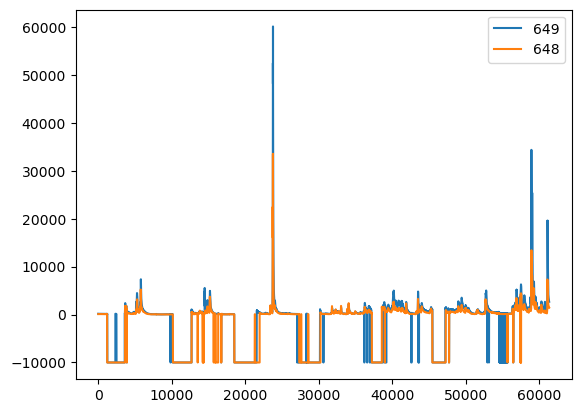

In [34]:
#set 5
x=range(len(df_648.discharge))
plt.plot(x,df_649.discharge,label='649')
plt.plot(x,df_648.discharge,label='648')
plt.legend()

### set 10

In [54]:
#set 10: ['654', '653']
df_654 = pd.read_csv('Iowa_small/data_time_series/654_data.csv')
df_653 = pd.read_csv('Iowa_small/data_time_series/653_data.csv')

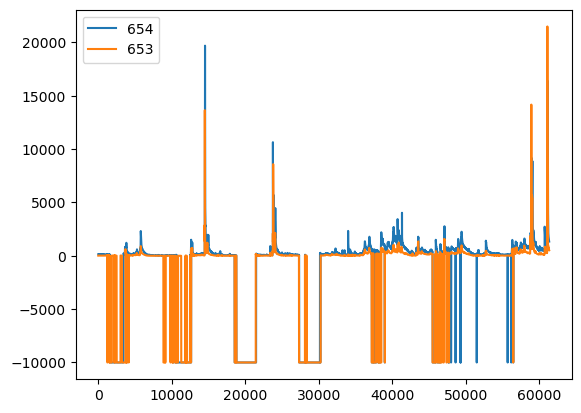

In [49]:
x=range(len(df_654.discharge))
plt.plot(x,df_654.discharge,label='654')
plt.plot(x,df_653.discharge,label='653')
plt.legend()

In [55]:
df_654.datetime[39000:45000]

39000    2016-03-13 00:00:00
39001    2016-03-13 01:00:00
39002    2016-03-13 02:00:00
39003    2016-03-13 03:00:00
39004    2016-03-13 04:00:00
                ...         
44995    2016-11-17 19:00:00
44996    2016-11-17 20:00:00
44997    2016-11-17 21:00:00
44998    2016-11-17 22:00:00
44999    2016-11-17 23:00:00
Name: datetime, Length: 6000, dtype: object

In [53]:
#df_654.datetime[58000:]
df_654.sort_values(by='discharge', inplace=True, ascending=False)
df_654[1:20]

,datetime,precipitation,et,discharge,travel_time,area,slope,loam,silt,sandy_clay_loam,silty_clay_loam
14529,2013-05-28 09:00:00,0.020600,48,19375.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14531,2013-05-28 11:00:00,0.000000,48,19300.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14528,2013-05-28 08:00:00,0.010657,48,18850.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14532,2013-05-28 12:00:00,0.000000,48,18775.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14533,2013-05-28 13:00:00,0.000000,48,17850.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14527,2013-05-28 07:00:00,0.006257,48,17425.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14534,2013-05-28 14:00:00,0.001353,48,17250.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14526,2013-05-28 06:00:00,0.000000,48,16525.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
14535,2013-05-28 15:00:00,0.035602,48,16475.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255
61168,2018-09-22 16:00:00,0.000000,52,16400.0,53.0,2301.0,0.00165,0.009351,0.099034,0.016361,0.875255


### set 8

In [21]:
df_557 = pd.read_csv('Iowa_small/data_time_series/557_data.csv')
df_622 = pd.read_csv('Iowa_small/data_time_series/622_data.csv')
df_556 = pd.read_csv('Iowa_small/data_time_series/556_data.csv')

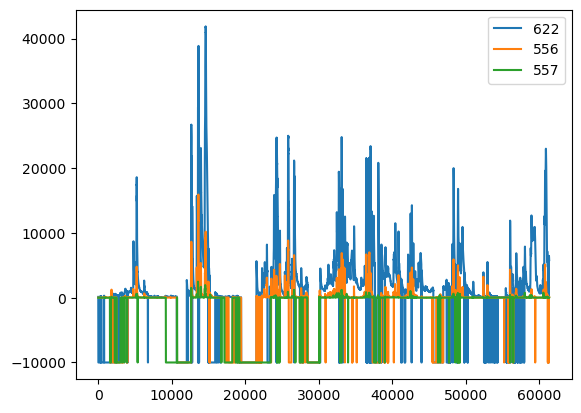

In [24]:
#set 8
x=range(len(df_557.discharge))
plt.plot(x,df_622.discharge,label='622')
plt.plot(x,df_556.discharge,label='556')
plt.plot(x,df_557.discharge,label='557')
plt.legend()

In [25]:
#set 1: '519', '586', '585'
df_519 = pd.read_csv('Iowa_small/data_time_series/519_data.csv')
df_585 = pd.read_csv('Iowa_small/data_time_series/585_data.csv')
df_586 = pd.read_csv('Iowa_small/data_time_series/586_data.csv')

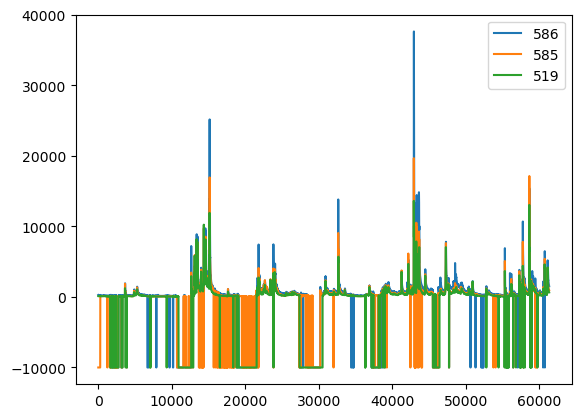

In [27]:
x=range(len(df_519.discharge))
plt.plot(x,df_586.discharge,label='586')
plt.plot(x,df_585.discharge,label='585')
plt.plot(x,df_519.discharge,label='519')
plt.legend()

### set 9

In [28]:
#set 9: ['590', '591', '526']
df_591 = pd.read_csv('Iowa_small/data_time_series/591_data.csv')
df_590 = pd.read_csv('Iowa_small/data_time_series/590_data.csv')
df_526 = pd.read_csv('Iowa_small/data_time_series/526_data.csv')

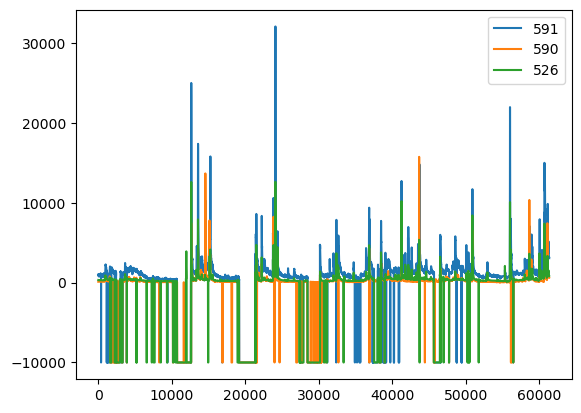

In [29]:
x=range(len(df_591.discharge))
plt.plot(x,df_591.discharge,label='591')
plt.plot(x,df_590.discharge,label='590')
plt.plot(x,df_526.discharge,label='526')
plt.legend()

In [57]:
df_591.datetime[52000:]

52000    2017-09-05 16:00:00
52001    2017-09-05 17:00:00
52002    2017-09-05 18:00:00
52003    2017-09-05 19:00:00
52004    2017-09-05 20:00:00
                ...         
61363    2018-09-30 19:00:00
61364    2018-09-30 20:00:00
61365    2018-09-30 21:00:00
61366    2018-09-30 22:00:00
61367    2018-09-30 23:00:00
Name: datetime, Length: 9368, dtype: object

### set 13

In [30]:
#set 13: '659', '660', '575'
df_660 = pd.read_csv('Iowa_small/data_time_series/660_data.csv')
df_575 = pd.read_csv('Iowa_small/data_time_series/575_data.csv')
df_659 = pd.read_csv('Iowa_small/data_time_series/659_data.csv')

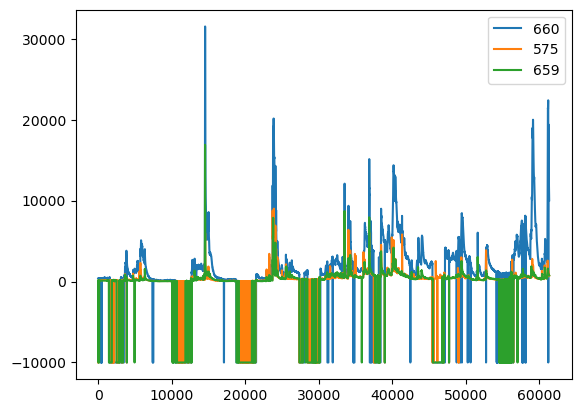

In [31]:
x=range(len(df_660.discharge))
plt.plot(x,df_660.discharge,label='660')
plt.plot(x,df_575.discharge,label='575')
plt.plot(x,df_659.discharge,label='659')
plt.legend()

### Set 14

In [32]:
#set 14: '673', '579', '671'
df_673 = pd.read_csv('Iowa_small/data_time_series/673_data.csv')
df_579 = pd.read_csv('Iowa_small/data_time_series/579_data.csv')
df_671 = pd.read_csv('Iowa_small/data_time_series/671_data.csv')

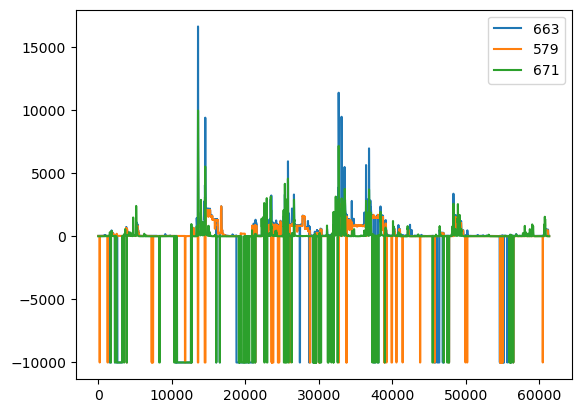

In [33]:
x=range(len(df_673.discharge))
plt.plot(x,df_673.discharge,label='663')
plt.plot(x,df_579.discharge,label='579')
plt.plot(x,df_671.discharge,label='671')
plt.legend()

### Set 15

In [35]:
#set 15: '656', '658', '657'
df_658 = pd.read_csv('Iowa_small/data_time_series/658_data.csv')
df_657 = pd.read_csv('Iowa_small/data_time_series/657_data.csv')
df_656 = pd.read_csv('Iowa_small/data_time_series/656_data.csv')

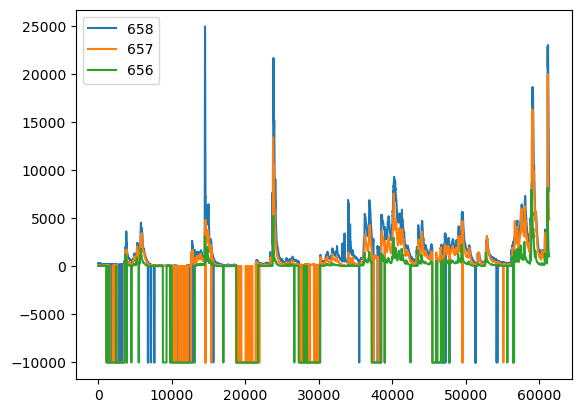

In [36]:
x=range(len(df_658.discharge))
plt.plot(x,df_658.discharge,label='658')
plt.plot(x,df_657.discharge,label='657')
plt.plot(x,df_656.discharge,label='656')
plt.legend()

In [47]:
df_658.datetime[48000:]

48000    2017-03-23 00:00:00
48001    2017-03-23 01:00:00
48002    2017-03-23 02:00:00
48003    2017-03-23 03:00:00
48004    2017-03-23 04:00:00
                ...         
61363    2018-09-30 19:00:00
61364    2018-09-30 20:00:00
61365    2018-09-30 21:00:00
61366    2018-09-30 22:00:00
61367    2018-09-30 23:00:00
Name: datetime, Length: 13368, dtype: object

### # of CC

In [38]:
len(connectedcom)

15

In [44]:
# csv
path ="Iowa_small/data_time_series"
outputpath ="Iowa_small/time_series"
j=0
for cc in connectedcom:
    j=j+1
    print('processing set'+str(j))
    for station in cc:
        print('processiong station:'+station)
        filename=path+'/'+station+'_data.csv'
        #print('filename:'+filename)
        X = pd.read_csv(filename)
        X['stationid']=station
        for i in range(len(X)):#len(X)):
            newfilename=X.datetime[i]
            filepath=outputpath+'/'+'set'+str(j)+'/'+newfilename+'.csv'
            if os.path.exists(filepath):
                X.loc[:,'precipitation':'stationid'].loc[[i],:].to_csv(filepath,mode='a', header=False, index=False)
                #X.loc[[i],:].to_csv(filepath,mode='a', header=False, index=False)
            else:
                X.loc[:,'precipitation':'stationid'].loc[[i],:].to_csv(filepath, index=False)

processing set1
processiong station:519
processiong station:586
processiong station:585
processing set2
processiong station:596
processiong station:595
processiong station:534
processiong station:1609
processiong station:535
processing set3
processiong station:609
processiong station:608
processiong station:603
processiong station:546
processiong station:607
processiong station:539
processiong station:614
processiong station:597
processiong station:613
processiong station:551
processiong station:605
processiong station:601
processiong station:598
processiong station:610
processiong station:1688
processiong station:552
processiong station:611
processiong station:612
processiong station:543
processiong station:600
processiong station:615
processiong station:541
processiong station:602
processiong station:549
processiong station:599
processiong station:544
processiong station:542
processiong station:604
processiong station:540
processiong station:553
processiong station:606
processing set

In [46]:
df_658.datetime[48000:]

48000    2017-03-23 00:00:00
48001    2017-03-23 01:00:00
48002    2017-03-23 02:00:00
48003    2017-03-23 03:00:00
48004    2017-03-23 04:00:00
                ...         
61363    2018-09-30 19:00:00
61364    2018-09-30 20:00:00
61365    2018-09-30 21:00:00
61366    2018-09-30 22:00:00
61367    2018-09-30 23:00:00
Name: datetime, Length: 13368, dtype: object

In [67]:
path='Iowa_small/set5'
files = [f for f in os.listdir(path) if f.endswith('.csv')]
#files = os.listdir(outputpath)
completefiles=[]
for file in files:
    X = pd.read_csv(path+'/'+file)
    num=0
    for i in range(len(X)):
        if(X.iloc[i,2]<=0):
            num=num+1
    if (num==0):
        completefiles.append(file)
        print(file)

2018-04-27 22:00:00.csv
2017-06-03 17:00:00.csv
2017-04-28 16:00:00.csv
2017-11-30 01:00:00.csv
2018-03-15 06:00:00.csv
2017-06-16 22:00:00.csv
2018-06-19 16:00:00.csv
2017-08-01 18:00:00.csv
2018-08-15 04:00:00.csv
2018-08-17 01:00:00.csv
2018-04-30 12:00:00.csv
2018-03-17 03:00:00.csv
2017-06-01 12:00:00.csv
2017-10-05 08:00:00.csv
2018-05-09 03:00:00.csv
2018-07-22 02:00:00.csv
2017-12-20 14:00:00.csv
2017-05-13 02:00:00.csv
2018-09-22 08:00:00.csv
2017-05-11 07:00:00.csv
2017-10-09 10:00:00.csv
2017-12-22 11:00:00.csv
2018-07-20 07:00:00.csv
2017-09-23 21:00:00.csv
2017-04-05 06:00:00.csv
2018-01-13 17:00:00.csv
2017-08-22 15:00:00.csv
2017-08-20 10:00:00.csv
2017-04-07 03:00:00.csv
2017-11-11 09:00:00.csv
2017-09-19 01:00:00.csv
2017-10-26 05:00:00.csv
2017-07-15 13:00:00.csv
2017-10-28 18:00:00.csv
2017-12-03 19:00:00.csv
2018-05-24 13:00:00.csv
2018-09-03 00:00:00.csv
2018-09-01 05:00:00.csv
2017-09-15 19:00:00.csv
2018-05-26 16:00:00.csv
2017-05-29 22:00:00.csv
2017-07-02 23:00

2017-08-18 21:00:00.csv
2018-08-17 15:00:00.csv
2018-08-19 08:00:00.csv
2018-08-02 20:00:00.csv
2017-06-01 06:00:00.csv
2018-03-17 17:00:00.csv
2017-11-30 15:00:00.csv
2018-03-15 12:00:00.csv
2017-06-03 03:00:00.csv
2017-04-28 02:00:00.csv
2018-08-15 10:00:00.csv
2017-11-25 20:00:00.csv
2018-06-19 02:00:00.csv
2017-07-29 00:00:00.csv
2017-05-02 01:00:00.csv
2017-12-31 17:00:00.csv
2017-09-25 12:00:00.csv
2018-05-18 00:00:00.csv
2018-02-28 21:00:00.csv
2018-07-31 04:00:00.csv
2017-07-25 18:00:00.csv
2018-09-28 23:00:00.csv
2017-09-27 17:00:00.csv
2017-10-18 13:00:00.csv
2018-05-14 18:00:00.csv
2017-06-07 21:00:00.csv
2018-04-23 14:00:00.csv
2018-06-08 15:00:00.csv
2018-08-04 07:00:00.csv
2017-11-21 02:00:00.csv
2018-03-04 05:00:00.csv
2017-06-12 14:00:00.csv
2018-06-06 08:00:00.csv
2017-06-10 11:00:00.csv
2017-11-23 07:00:00.csv
2018-03-06 00:00:00.csv
2018-08-06 02:00:00.csv
2018-04-21 11:00:00.csv
2018-09-12 03:00:00.csv
2017-09-08 02:00:00.csv
2017-07-04 10:00:00.csv
2018-02-12 01:00

2018-06-29 09:00:00.csv
2017-04-16 14:00:00.csv
2018-04-19 20:00:00.csv
2017-08-31 07:00:00.csv
2017-04-14 11:00:00.csv
2018-03-29 01:00:00.csv
2018-06-25 11:00:00.csv
2018-08-29 03:00:00.csv
2017-07-06 01:00:00.csv
2018-02-10 10:00:00.csv
2017-10-20 22:00:00.csv
2018-09-10 12:00:00.csv
2018-09-12 17:00:00.csv
2018-02-07 20:00:00.csv
2017-05-21 18:00:00.csv
2018-02-12 15:00:00.csv
2018-07-10 18:00:00.csv
2017-07-04 04:00:00.csv
2017-09-08 16:00:00.csv
2018-09-07 22:00:00.csv
2018-08-13 23:00:00.csv
2017-11-23 13:00:00.csv
2018-03-06 14:00:00.csv
2017-06-10 05:00:00.csv
2018-06-04 19:00:00.csv
2018-03-08 09:00:00.csv
2018-03-13 21:00:00.csv
2018-04-21 05:00:00.csv
2017-08-09 22:00:00.csv
2018-08-06 16:00:00.csv
2018-08-04 13:00:00.csv
2018-04-23 00:00:00.csv
2018-06-08 01:00:00.csv
2017-06-12 00:00:00.csv
2017-11-21 16:00:00.csv
2018-03-04 11:00:00.csv
2018-07-31 10:00:00.csv
2017-10-18 07:00:00.csv
2017-09-27 03:00:00.csv
2017-09-25 06:00:00.csv
2018-07-26 20:00:00.csv
2017-07-29 14:00

2017-08-03 04:00:00.csv
2018-08-19 05:00:00.csv
2018-06-15 17:00:00.csv
2017-10-05 11:00:00.csv
2018-02-20 16:00:00.csv
2018-09-20 14:00:00.csv
2018-05-07 07:00:00.csv
2017-10-12 21:00:00.csv
2017-10-09 09:00:00.csv
2017-12-22 08:00:00.csv
2018-05-05 02:00:00.csv
2018-09-22 11:00:00.csv
2017-10-07 14:00:00.csv
2018-02-22 13:00:00.csv
2017-11-13 15:00:00.csv
2017-06-20 03:00:00.csv
2017-11-06 20:00:00.csv
2018-04-11 03:00:00.csv
2018-04-13 06:00:00.csv
2018-03-21 22:00:00.csv
2017-08-20 09:00:00.csv
2018-08-21 20:00:00.csv
2017-06-22 06:00:00.csv
2017-04-09 07:00:00.csv
2017-11-11 10:00:00.csv
2017-05-25 23:00:00.csv
2018-07-01 16:00:00.csv
2017-09-19 18:00:00.csv
2017-09-17 05:00:00.csv
2018-09-03 19:00:00.csv
2018-07-14 23:00:00.csv
2017-05-30 16:00:00.csv
2017-10-28 01:00:00.csv
2017-12-03 00:00:00.csv
2017-12-01 05:00:00.csv
2017-07-19 12:00:00.csv
2017-09-15 00:00:00.csv
2017-10-24 19:00:00.csv
2018-05-28 12:00:00.csv
2018-07-03 13:00:00.csv
2017-12-02 06:00:00.csv
2017-10-29 07:00

2017-11-13 20:00:00.csv
2018-08-23 10:00:00.csv
2018-08-21 15:00:00.csv
2018-04-06 06:00:00.csv
2018-03-21 17:00:00.csv
2017-11-04 10:00:00.csv
2018-09-18 04:00:00.csv
2017-05-30 23:00:00.csv
2018-07-14 16:00:00.csv
2018-02-18 06:00:00.csv
2017-12-16 00:00:00.csv
2018-07-01 23:00:00.csv
2017-05-25 16:00:00.csv
2017-09-02 05:00:00.csv
2018-09-16 19:00:00.csv
2017-05-27 13:00:00.csv
2017-12-14 05:00:00.csv
2018-07-16 13:00:00.csv
2017-10-31 19:00:00.csv
2018-04-29 13:00:00.csv
2018-06-02 12:00:00.csv
2017-11-25 18:00:00.csv
2017-06-18 13:00:00.csv
2017-08-14 01:00:00.csv
2018-08-02 18:00:00.csv
2017-08-16 04:00:00.csv
2017-11-29 00:00:00.csv
2018-06-15 22:00:00.csv
2017-04-24 22:00:00.csv
2017-08-18 19:00:00.csv
2018-09-20 21:00:00.csv
2017-10-10 11:00:00.csv
2017-07-23 07:00:00.csv
2017-05-08 06:00:00.csv
2018-02-20 23:00:00.csv
2018-05-12 07:00:00.csv
2017-09-21 08:00:00.csv
2018-05-10 02:00:00.csv
2017-10-07 21:00:00.csv
2017-07-21 02:00:00.csv
2017-10-12 14:00:00.csv
2018-02-24 20:00

2017-11-22 13:00:00.csv
2018-03-07 14:00:00.csv
2018-08-11 20:00:00.csv
2017-06-12 06:00:00.csv
2017-11-21 10:00:00.csv
2018-03-04 17:00:00.csv
2018-06-08 07:00:00.csv
2018-04-23 06:00:00.csv
2018-03-11 22:00:00.csv
2017-08-10 09:00:00.csv
2018-08-04 15:00:00.csv
2018-08-06 10:00:00.csv
2018-04-21 03:00:00.csv
2017-11-23 15:00:00.csv
2018-03-06 12:00:00.csv
2017-06-10 03:00:00.csv
2017-10-14 19:00:00.csv
2018-05-18 12:00:00.csv
2017-12-31 05:00:00.csv
2017-05-02 13:00:00.csv
2017-07-29 12:00:00.csv
2017-09-25 00:00:00.csv
2017-09-27 05:00:00.csv
2018-07-24 23:00:00.csv
2017-10-18 01:00:00.csv
2017-05-15 23:00:00.csv
2018-07-31 16:00:00.csv
2017-09-29 18:00:00.csv
2018-08-29 05:00:00.csv
2018-06-25 17:00:00.csv
2017-04-01 22:00:00.csv
2017-04-14 17:00:00.csv
2018-06-30 22:00:00.csv
2018-03-29 07:00:00.csv
2018-08-27 18:00:00.csv
2017-08-31 01:00:00.csv
2017-04-16 12:00:00.csv
2017-03-31 03:00:00.csv
2018-06-27 12:00:00.csv
2017-09-08 10:00:00.csv
2018-02-12 13:00:00.csv
2017-07-04 02:00

2018-04-30 00:00:00.csv
2017-11-27 23:00:00.csv
2018-05-24 01:00:00.csv
2017-12-18 23:00:00.csv
2018-09-03 12:00:00.csv
2017-09-19 13:00:00.csv
2017-07-15 01:00:00.csv
2017-10-26 17:00:00.csv
2017-10-24 12:00:00.csv
2018-07-03 18:00:00.csv
2018-05-28 19:00:00.csv
2017-07-17 04:00:00.csv
2018-09-14 22:00:00.csv
2018-09-01 17:00:00.csv
2018-02-14 20:00:00.csv
2017-07-19 19:00:00.csv
2018-05-26 04:00:00.csv
2018-01-13 05:00:00.csv
2018-04-11 08:00:00.csv
2017-04-05 14:00:00.csv
2018-06-21 21:00:00.csv
2017-08-22 07:00:00.csv
2017-06-20 08:00:00.csv
2017-04-10 21:00:00.csv
2017-08-20 02:00:00.csv
2017-04-07 11:00:00.csv
2017-03-26 06:00:00.csv
2018-06-30 17:00:00.csv
2017-04-14 22:00:00.csv
2017-08-28 19:00:00.csv
2017-08-26 04:00:00.csv
2017-11-19 00:00:00.csv
2017-04-01 17:00:00.csv
2018-06-25 22:00:00.csv
2017-04-03 12:00:00.csv
2017-06-28 13:00:00.csv
2017-08-24 01:00:00.csv
2018-04-19 13:00:00.csv
2017-11-15 18:00:00.csv
2017-03-24 03:00:00.csv
2017-07-11 02:00:00.csv
2018-02-07 13:00

2017-05-20 15:00:00.csv
2018-07-04 20:00:00.csv
2017-12-13 03:00:00.csv
2017-10-30 19:00:00.csv
2018-07-17 13:00:00.csv
2017-09-01 00:00:00.csv
2017-12-15 05:00:00.csv
2017-05-26 13:00:00.csv
2017-05-24 16:00:00.csv
2018-02-19 06:00:00.csv
2017-12-17 00:00:00.csv
2018-09-17 19:00:00.csv
2017-09-03 05:00:00.csv
2018-09-19 04:00:00.csv
2018-07-15 16:00:00.csv
2017-05-31 23:00:00.csv
2018-03-20 17:00:00.csv
2017-11-05 10:00:00.csv
2018-08-20 15:00:00.csv
2018-04-07 06:00:00.csv
2017-11-12 20:00:00.csv
2017-11-09 08:00:00.csv
2018-04-05 03:00:00.csv
2018-08-22 10:00:00.csv
2018-01-09 13:00:00.csv
2018-03-22 12:00:00.csv
2017-11-07 15:00:00.csv
2017-10-13 14:00:00.csv
2017-07-20 02:00:00.csv
2017-10-06 21:00:00.csv
2018-05-11 02:00:00.csv
2018-05-13 07:00:00.csv
2018-02-21 23:00:00.csv
2017-09-20 08:00:00.csv
2018-09-21 21:00:00.csv
2017-07-22 07:00:00.csv
2017-05-09 06:00:00.csv
2017-10-11 11:00:00.csv
2017-04-25 22:00:00.csv
2018-06-01 17:00:00.csv
2017-08-19 19:00:00.csv
2017-08-17 04:00

2017-12-04 06:00:00.csv
2018-07-06 10:00:00.csv
2018-09-08 07:00:00.csv
2018-07-04 15:00:00.csv
2017-05-20 20:00:00.csv
2017-07-10 09:00:00.csv
2018-02-08 05:00:00.csv
2017-12-06 03:00:00.csv
2018-07-11 20:00:00.csv
2018-05-21 09:00:00.csv
2017-09-12 06:00:00.csv
2017-08-06 07:00:00.csv
2018-06-05 21:00:00.csv
2017-04-21 14:00:00.csv
2018-03-12 19:00:00.csv
2017-06-04 08:00:00.csv
2018-06-10 14:00:00.csv
2018-06-12 11:00:00.csv
2017-06-08 10:00:00.csv
2017-04-23 11:00:00.csv
2017-08-04 02:00:00.csv
2018-09-27 12:00:00.csv
2017-10-17 22:00:00.csv
2017-07-31 01:00:00.csv
2017-10-02 17:00:00.csv
2018-02-27 10:00:00.csv
2018-09-30 22:00:00.csv
2018-02-25 15:00:00.csv
2018-07-27 18:00:00.csv
2017-05-18 05:00:00.csv
2017-05-16 18:00:00.csv
2018-05-02 04:00:00.csv
2018-07-29 05:00:00.csv
2018-09-25 17:00:00.csv
2018-05-01 07:00:00.csv
2018-09-26 14:00:00.csv
2017-09-29 20:00:00.csv
2018-09-28 09:00:00.csv
2017-10-03 11:00:00.csv
2018-02-26 16:00:00.csv
2017-07-30 07:00:00.csv
2017-05-19 03:00

2017-07-12 12:00:00.csv
2018-03-10 02:00:00.csv
2017-06-06 13:00:00.csv
2018-08-10 00:00:00.csv
2018-08-12 05:00:00.csv
2017-08-06 19:00:00.csv
2017-06-11 23:00:00.csv
2018-04-20 23:00:00.csv
2017-06-04 16:00:00.csv
2018-03-12 07:00:00.csv
2017-08-08 04:00:00.csv
2017-09-24 20:00:00.csv
2018-07-27 06:00:00.csv
2017-05-16 06:00:00.csv
2018-09-25 09:00:00.csv
2017-05-14 03:00:00.csv
2017-10-02 09:00:00.csv
2017-10-19 21:00:00.csv
2018-07-25 03:00:00.csv
2018-09-29 11:00:00.csv
2018-07-26 00:00:00.csv
2017-09-30 13:00:00.csv
2017-05-17 00:00:00.csv
2017-05-15 05:00:00.csv
2018-05-01 19:00:00.csv
2018-02-28 15:00:00.csv
2017-12-26 13:00:00.csv
2018-09-28 17:00:00.csv
2017-09-27 23:00:00.csv
2018-07-24 05:00:00.csv
2017-07-30 19:00:00.csv
2018-02-26 08:00:00.csv
2017-06-07 15:00:00.csv
2018-04-23 20:00:00.csv
2018-06-08 21:00:00.csv
2018-06-13 09:00:00.csv
2018-03-11 04:00:00.csv
2018-08-11 06:00:00.csv
2017-06-12 20:00:00.csv
2017-04-22 09:00:00.csv
2017-06-09 08:00:00.csv
2018-08-13 03:00

2018-04-07 18:00:00.csv
2018-05-13 19:00:00.csv
2017-05-07 05:00:00.csv
2017-09-20 16:00:00.csv
2017-07-22 19:00:00.csv
2017-05-09 18:00:00.csv
2017-10-08 22:00:00.csv
2017-09-22 13:00:00.csv
2017-05-05 00:00:00.csv
2018-04-26 10:00:00.csv
2018-08-01 03:00:00.csv
2017-06-17 10:00:00.csv
2018-03-01 01:00:00.csv
2017-11-24 06:00:00.csv
2018-01-28 05:00:00.csv
2018-03-03 04:00:00.csv
2017-11-26 03:00:00.csv
2018-06-01 09:00:00.csv
2017-06-15 15:00:00.csv
2017-08-19 07:00:00.csv
2018-08-03 06:00:00.csv
2017-04-30 09:00:00.csv
2018-04-24 15:00:00.csv
2017-08-14 19:00:00.csv
2018-04-27 16:00:00.csv
2017-06-03 23:00:00.csv
2017-04-28 22:00:00.csv
2017-11-25 00:00:00.csv
2017-06-16 16:00:00.csv
2018-06-19 22:00:00.csv
2017-08-18 01:00:00.csv
2017-06-14 13:00:00.csv
2018-03-02 02:00:00.csv
2017-11-27 05:00:00.csv
2018-04-25 13:00:00.csv
2017-11-29 18:00:00.csv
2018-08-02 00:00:00.csv
2017-09-21 10:00:00.csv
2017-05-06 03:00:00.csv
2017-12-20 20:00:00.csv
2017-10-10 09:00:00.csv
2017-05-04 06:00

2018-07-28 10:00:00.csv
2018-05-03 11:00:00.csv
2018-09-27 01:00:00.csv
2018-02-27 03:00:00.csv
2017-10-02 04:00:00.csv
2017-12-29 05:00:00.csv
2017-07-31 12:00:00.csv
2017-05-18 16:00:00.csv
2018-05-17 22:00:00.csv
2018-02-25 06:00:00.csv
2018-05-02 17:00:00.csv
2018-07-29 16:00:00.csv
2017-07-26 22:00:00.csv
2018-09-25 04:00:00.csv
2017-08-06 14:00:00.csv
2018-08-09 20:00:00.csv
2018-08-12 08:00:00.csv
2017-04-21 07:00:00.csv
2018-06-10 07:00:00.csv
2018-03-09 22:00:00.csv
2017-08-13 21:00:00.csv
2017-08-08 09:00:00.csv
2018-06-12 02:00:00.csv
2017-06-08 03:00:00.csv
2017-04-23 02:00:00.csv
2017-08-04 11:00:00.csv
2017-09-10 10:00:00.csv
2017-12-04 15:00:00.csv
2017-12-11 20:00:00.csv
2017-10-21 09:00:00.csv
2018-07-06 03:00:00.csv
2017-09-07 20:00:00.csv
2018-09-08 14:00:00.csv
2018-07-04 06:00:00.csv
2017-12-06 10:00:00.csv
2018-02-08 16:00:00.csv
2018-09-06 09:00:00.csv
2017-09-12 15:00:00.csv
2017-08-25 19:00:00.csv
2018-08-31 05:00:00.csv
2017-04-19 22:00:00.csv
2018-04-16 16:00

2018-04-12 20:00:00.csv
2018-04-09 08:00:00.csv
2018-06-22 09:00:00.csv
2018-08-20 06:00:00.csv
2017-04-08 21:00:00.csv
2017-06-23 20:00:00.csv
2018-04-07 15:00:00.csv
2017-04-13 09:00:00.csv
2018-04-05 10:00:00.csv
2018-08-22 03:00:00.csv
2017-11-07 06:00:00.csv
2018-03-22 01:00:00.csv
2018-07-17 00:00:00.csv
2017-09-01 13:00:00.csv
2017-05-26 00:00:00.csv
2017-12-15 16:00:00.csv
2017-12-17 13:00:00.csv
2018-02-19 15:00:00.csv
2017-05-24 05:00:00.csv
2018-05-30 19:00:00.csv
2017-09-03 16:00:00.csv
2017-09-16 23:00:00.csv
2018-09-19 17:00:00.csv
2018-02-17 08:00:00.csv
2018-07-15 05:00:00.csv
2017-07-01 19:00:00.csv
2017-09-24 07:00:00.csv
2018-05-17 08:00:00.csv
2018-07-27 21:00:00.csv
2017-05-03 14:00:00.csv
2017-07-28 15:00:00.csv
2017-07-26 08:00:00.csv
2017-05-16 21:00:00.csv
2018-05-19 15:00:00.csv
2018-07-30 11:00:00.csv
2017-10-19 06:00:00.csv
2017-05-01 11:00:00.csv
2017-09-26 02:00:00.csv
2018-08-05 12:00:00.csv
2018-06-09 00:00:00.csv
2018-03-05 10:00:00.csv
2017-11-20 17:00

2018-03-03 23:00:00.csv
2017-08-19 20:00:00.csv
2018-08-16 14:00:00.csv
2017-08-02 08:00:00.csv
2018-08-03 21:00:00.csv
2018-08-18 09:00:00.csv
2018-03-16 16:00:00.csv
2017-05-07 22:00:00.csv
2018-07-23 17:00:00.csv
2018-05-08 16:00:00.csv
2018-09-21 18:00:00.csv
2017-12-21 01:00:00.csv
2017-05-12 17:00:00.csv
2017-05-10 12:00:00.csv
2017-12-23 04:00:00.csv
2017-10-08 05:00:00.csv
2018-07-21 12:00:00.csv
2017-10-06 18:00:00.csv
2017-03-23 02:00:00.csv
2017-11-12 19:00:00.csv
2017-08-23 00:00:00.csv
2017-04-04 13:00:00.csv
2017-04-06 16:00:00.csv
2018-04-09 22:00:00.csv
2018-06-22 23:00:00.csv
2017-08-21 05:00:00.csv
2017-04-13 23:00:00.csv
2017-10-27 10:00:00.csv
2018-02-02 17:00:00.csv
2017-07-14 06:00:00.csv
2017-09-18 14:00:00.csv
2018-09-17 20:00:00.csv
2017-09-16 09:00:00.csv
2018-09-02 15:00:00.csv
2018-02-17 22:00:00.csv
2018-05-25 06:00:00.csv
2018-05-27 03:00:00.csv
2017-10-30 20:00:00.csv
2017-07-16 03:00:00.csv
2017-10-25 15:00:00.csv
2017-09-19 12:00:00.csv
2017-07-15 00:00

2017-08-23 14:00:00.csv
2018-09-23 09:00:00.csv
2017-10-08 11:00:00.csv
2017-05-10 06:00:00.csv
2018-07-21 06:00:00.csv
2017-09-22 20:00:00.csv
2018-07-23 03:00:00.csv
2018-05-08 02:00:00.csv
2017-10-04 09:00:00.csv
2017-05-12 03:00:00.csv
2017-12-21 15:00:00.csv
2018-08-16 00:00:00.csv
2018-03-16 02:00:00.csv
2018-03-14 07:00:00.csv
2018-04-26 23:00:00.csv
2017-04-29 17:00:00.csv
2017-06-02 16:00:00.csv
2017-06-17 23:00:00.csv
2018-06-18 17:00:00.csv
2018-08-14 05:00:00.csv
2017-07-25 06:00:00.csv
2017-10-16 10:00:00.csv
2018-09-26 20:00:00.csv
2017-09-29 14:00:00.csv
2017-09-27 09:00:00.csv
2018-05-14 06:00:00.csv
2018-02-26 22:00:00.csv
2017-10-01 20:00:00.csv
2017-12-31 09:00:00.csv
2018-05-16 03:00:00.csv
2017-10-14 15:00:00.csv
2017-07-27 03:00:00.csv
2017-11-23 19:00:00.csv
2018-06-04 13:00:00.csv
2018-08-08 01:00:00.csv
2017-08-12 00:00:00.csv
2018-03-08 03:00:00.csv
2018-06-13 23:00:00.csv
2018-08-04 19:00:00.csv
2017-08-10 05:00:00.csv
2017-04-22 23:00:00.csv
2017-06-09 22:00

2018-07-12 03:00:00.csv
2017-12-10 15:00:00.csv
2017-07-08 02:00:00.csv
2017-05-23 03:00:00.csv
2017-09-04 10:00:00.csv
2017-08-10 11:00:00.csv
2018-01-21 13:00:00.csv
2017-11-21 08:00:00.csv
2018-06-06 02:00:00.csv
2017-08-07 21:00:00.csv
2018-08-08 15:00:00.csv
2018-06-04 07:00:00.csv
2018-03-08 17:00:00.csv
2018-08-06 08:00:00.csv
2017-08-12 14:00:00.csv
2017-09-25 18:00:00.csv
2017-05-19 23:00:00.csv
2018-05-16 17:00:00.csv
2018-07-28 23:00:00.csv
2018-05-03 22:00:00.csv
2017-07-27 17:00:00.csv
2017-10-14 01:00:00.csv
2017-09-29 00:00:00.csv
2017-10-16 04:00:00.csv
2017-07-25 12:00:00.csv
2017-10-18 19:00:00.csv
2018-05-14 12:00:00.csv
2017-08-03 03:00:00.csv
2017-04-24 10:00:00.csv
2018-03-19 00:00:00.csv
2018-06-15 10:00:00.csv
2018-08-19 02:00:00.csv
2018-03-15 18:00:00.csv
2017-06-18 21:00:00.csv
2018-06-17 15:00:00.csv
2017-06-03 09:00:00.csv
2017-04-28 08:00:00.csv
2018-06-02 20:00:00.csv
2018-04-29 21:00:00.csv
2017-04-26 15:00:00.csv
2018-06-19 08:00:00.csv
2017-08-01 06:00

2017-06-22 15:00:00.csv
2017-04-09 14:00:00.csv
2018-04-06 20:00:00.csv
2018-02-20 05:00:00.csv
2017-10-05 02:00:00.csv
2018-05-12 21:00:00.csv
2018-05-09 09:00:00.csv
2018-07-22 08:00:00.csv
2018-09-20 07:00:00.csv
2017-05-08 20:00:00.csv
2017-07-23 21:00:00.csv
2018-05-07 14:00:00.csv
2017-05-13 08:00:00.csv
2018-05-05 11:00:00.csv
2018-09-22 02:00:00.csv
2018-02-22 00:00:00.csv
2017-10-07 07:00:00.csv
2018-06-17 01:00:00.csv
2017-08-01 12:00:00.csv
2017-04-26 01:00:00.csv
2018-03-19 14:00:00.csv
2017-04-24 04:00:00.csv
2018-04-30 18:00:00.csv
2017-08-03 17:00:00.csv
2017-08-16 22:00:00.csv
2018-08-19 16:00:00.csv
2018-03-17 09:00:00.csv
2018-06-15 04:00:00.csv
2017-06-01 18:00:00.csv
2017-08-25 22:00:00.csv
2018-03-24 09:00:00.csv
2017-03-30 15:00:00.csv
2018-06-26 04:00:00.csv
2017-04-19 19:00:00.csv
2017-03-25 20:00:00.csv
2017-04-17 04:00:00.csv
2018-04-03 18:00:00.csv
2018-06-28 19:00:00.csv
2017-08-30 17:00:00.csv
2017-04-15 01:00:00.csv
2018-03-28 11:00:00.csv
2018-06-24 01:00

2018-04-20 01:00:00.csv
2017-12-08 22:00:00.csv
2017-10-23 23:00:00.csv
2018-09-13 13:00:00.csv
2017-09-09 12:00:00.csv
2017-07-05 00:00:00.csv
2018-02-13 11:00:00.csv
2018-02-11 14:00:00.csv
2017-07-07 05:00:00.csv
2018-07-13 19:00:00.csv
2018-09-04 23:00:00.csv
2018-09-11 16:00:00.csv
2018-02-04 21:00:00.csv
2017-07-09 18:00:00.csv
2017-05-22 19:00:00.csv
2018-03-28 05:00:00.csv
2017-04-15 15:00:00.csv
2018-04-01 09:00:00.csv
2018-08-28 07:00:00.csv
2018-03-26 18:00:00.csv
2018-06-24 15:00:00.csv
2017-06-30 09:00:00.csv
2018-06-26 10:00:00.csv
2017-03-30 01:00:00.csv
2017-08-30 03:00:00.csv
2017-04-17 10:00:00.csv
2018-01-01 01:00:00.csv
2018-05-27 12:00:00.csv
2017-10-25 04:00:00.csv
2017-07-16 12:00:00.csv
2017-07-14 17:00:00.csv
2018-05-30 22:00:00.csv
2017-10-27 01:00:00.csv
2017-09-18 05:00:00.csv
2017-09-16 18:00:00.csv
2018-09-02 04:00:00.csv
2018-05-25 17:00:00.csv
2017-07-01 22:00:00.csv
2017-04-06 07:00:00.csv
2017-08-21 14:00:00.csv
2017-11-09 20:00:00.csv
2017-03-23 13:00

2018-07-21 17:00:00.csv
2017-04-11 23:00:00.csv
2017-03-23 07:00:00.csv
2017-04-04 16:00:00.csv
2018-06-20 23:00:00.csv
2017-08-23 05:00:00.csv
2017-08-21 00:00:00.csv
2017-04-06 13:00:00.csv
2017-11-10 19:00:00.csv
2017-09-18 11:00:00.csv
2017-10-27 15:00:00.csv
2017-07-14 03:00:00.csv
2017-12-19 21:00:00.csv
2017-10-29 08:00:00.csv
2017-12-02 09:00:00.csv
2018-05-25 03:00:00.csv
2018-09-02 10:00:00.csv
2017-09-14 09:00:00.csv
2018-05-27 06:00:00.csv
2018-02-15 22:00:00.csv
2017-07-16 06:00:00.csv
2017-10-25 10:00:00.csv
2018-09-15 20:00:00.csv
2017-06-24 23:00:00.csv
2018-08-27 05:00:00.csv
2018-08-29 18:00:00.csv
2017-11-02 00:00:00.csv
2018-03-27 07:00:00.csv
2018-04-15 23:00:00.csv
2017-04-18 12:00:00.csv
2018-03-25 02:00:00.csv
2018-08-25 00:00:00.csv
2018-06-29 12:00:00.csv
2018-04-02 13:00:00.csv
2017-05-21 03:00:00.csv
2017-12-12 15:00:00.csv
2017-09-06 10:00:00.csv
2018-07-10 03:00:00.csv
2017-12-07 20:00:00.csv
2018-07-12 06:00:00.csv
2017-09-11 20:00:00.csv
2017-09-04 15:00

2017-11-02 14:00:00.csv
2018-03-27 13:00:00.csv
2017-12-16 23:00:00.csv
2018-07-01 00:00:00.csv
2017-12-03 16:00:00.csv
2017-10-28 17:00:00.csv
2017-05-30 00:00:00.csv
2017-09-17 13:00:00.csv
2017-09-15 16:00:00.csv
2018-05-26 19:00:00.csv
2017-07-19 04:00:00.csv
2017-12-01 13:00:00.csv
2017-07-17 19:00:00.csv
2018-07-03 05:00:00.csv
2018-05-28 04:00:00.csv
2017-06-20 15:00:00.csv
2018-04-04 20:00:00.csv
2017-11-13 03:00:00.csv
2017-04-05 09:00:00.csv
2018-04-11 15:00:00.csv
2018-04-13 10:00:00.csv
2017-11-11 06:00:00.csv
2017-04-09 11:00:00.csv
2017-06-22 10:00:00.csv
2018-02-20 00:00:00.csv
2017-10-05 07:00:00.csv
2018-05-07 11:00:00.csv
2018-09-20 02:00:00.csv
2018-09-22 07:00:00.csv
2017-07-21 21:00:00.csv
2018-05-05 14:00:00.csv
2017-05-11 08:00:00.csv
2018-05-10 21:00:00.csv
2018-07-20 08:00:00.csv
2018-02-22 05:00:00.csv
2017-10-07 02:00:00.csv
2017-08-14 22:00:00.csv
2018-06-17 04:00:00.csv
2017-04-28 19:00:00.csv
2017-06-03 18:00:00.csv
2018-03-15 09:00:00.csv
2017-04-26 04:00

2018-03-11 01:00:00.csv
2018-08-11 03:00:00.csv
2018-08-13 06:00:00.csv
2017-06-10 20:00:00.csv
2017-04-20 09:00:00.csv
2018-03-13 04:00:00.csv
2017-06-05 15:00:00.csv
2018-04-21 20:00:00.csv
2018-06-11 09:00:00.csv
2017-08-09 07:00:00.csv
2017-10-22 02:00:00.csv
2017-12-09 03:00:00.csv
2018-02-07 05:00:00.csv
2018-07-05 08:00:00.csv
2017-07-11 14:00:00.csv
2018-02-09 18:00:00.csv
2017-07-04 21:00:00.csv
2018-05-20 14:00:00.csv
2018-09-07 07:00:00.csv
2018-09-05 02:00:00.csv
2018-05-22 11:00:00.csv
2018-07-09 10:00:00.csv
2017-07-13 11:00:00.csv
2017-10-20 07:00:00.csv
2018-06-30 01:00:00.csv
2017-03-26 10:00:00.csv
2017-04-01 01:00:00.csv
2017-11-19 16:00:00.csv
2017-08-26 12:00:00.csv
2017-08-24 17:00:00.csv
2017-03-31 20:00:00.csv
2018-04-17 18:00:00.csv
2017-06-28 05:00:00.csv
2017-04-03 04:00:00.csv
2017-03-24 15:00:00.csv
2018-03-30 09:00:00.csv
2017-06-26 18:00:00.csv
2018-04-19 05:00:00.csv
2017-08-31 22:00:00.csv
2017-03-27 16:00:00.csv
2018-03-28 22:00:00.csv
2017-08-29 09:00

2018-06-21 02:00:00.csv
2018-04-08 06:00:00.csv
2018-06-23 07:00:00.csv
2017-08-20 21:00:00.csv
2018-08-21 08:00:00.csv
2017-04-12 07:00:00.csv
2017-07-15 22:00:00.csv
2018-05-31 17:00:00.csv
2018-09-16 04:00:00.csv
2017-09-02 18:00:00.csv
2018-09-18 19:00:00.csv
2018-05-24 22:00:00.csv
2017-12-18 00:00:00.csv
2018-02-16 06:00:00.csv
2017-10-31 04:00:00.csv
2018-02-14 03:00:00.csv
2017-07-02 12:00:00.csv
2017-05-29 13:00:00.csv
2018-09-14 01:00:00.csv
2017-12-14 18:00:00.csv
2018-07-18 13:00:00.csv
2018-09-17 02:00:00.csv
2018-05-30 11:00:00.csv
2017-12-19 06:00:00.csv
2018-02-17 00:00:00.csv
2017-07-01 11:00:00.csv
2017-05-28 15:00:00.csv
2017-07-03 14:00:00.csv
2018-05-27 21:00:00.csv
2018-07-17 08:00:00.csv
2017-10-30 02:00:00.csv
2018-02-15 05:00:00.csv
2018-07-19 15:00:00.csv
2017-07-16 21:00:00.csv
2017-05-26 08:00:00.csv
2018-09-15 07:00:00.csv
2017-04-11 04:00:00.csv
2018-04-05 18:00:00.csv
2017-11-09 13:00:00.csv
2017-03-23 20:00:00.csv
2018-06-20 04:00:00.csv
2018-03-22 09:00

2018-03-31 02:00:00.csv
2017-11-16 00:00:00.csv
2018-04-01 23:00:00.csv
2017-06-25 16:00:00.csv
2017-08-29 04:00:00.csv
2017-08-27 19:00:00.csv
2017-03-29 06:00:00.csv
2017-06-30 23:00:00.csv
2018-04-14 16:00:00.csv
2018-08-30 06:00:00.csv
2017-06-28 08:00:00.csv
2017-04-03 09:00:00.csv
2018-04-17 15:00:00.csv
2017-04-18 21:00:00.csv
2017-11-15 03:00:00.csv
2018-03-30 04:00:00.csv
2017-03-24 18:00:00.csv
2018-04-19 08:00:00.csv
2017-06-26 15:00:00.csv
2018-06-29 21:00:00.csv
2018-04-02 20:00:00.csv
2017-08-28 02:00:00.csv
2017-06-24 10:00:00.csv
2017-11-17 06:00:00.csv
2018-04-15 10:00:00.csv
2017-03-28 00:00:00.csv
2017-09-11 13:00:00.csv
2017-12-05 16:00:00.csv
2018-07-07 00:00:00.csv
2017-12-10 23:00:00.csv
2018-09-09 17:00:00.csv
2017-09-06 23:00:00.csv
2018-02-07 08:00:00.csv
2017-07-11 19:00:00.csv
2018-07-05 05:00:00.csv
2017-12-07 13:00:00.csv
2018-02-09 15:00:00.csv
2018-05-20 19:00:00.csv
2017-09-13 16:00:00.csv
2018-08-08 23:00:00.csv
2017-08-07 17:00:00.csv
2017-04-20 04:00

2017-11-07 03:00:00.csv
2018-03-22 04:00:00.csv
2018-01-09 05:00:00.csv
2017-09-14 23:00:00.csv
2018-07-17 05:00:00.csv
2017-05-28 18:00:00.csv
2017-07-03 19:00:00.csv
2018-02-15 08:00:00.csv
2017-05-26 05:00:00.csv
2018-07-19 18:00:00.csv
2017-12-15 13:00:00.csv
2017-09-01 16:00:00.csv
2017-09-03 13:00:00.csv
2017-12-17 16:00:00.csv
2018-02-19 10:00:00.csv
2017-05-24 00:00:00.csv
2017-10-29 22:00:00.csv
2017-12-02 23:00:00.csv
2018-07-15 00:00:00.csv
2018-09-19 12:00:00.csv
2017-10-31 09:00:00.csv
2017-12-01 20:00:00.csv
2018-07-16 03:00:00.csv
2017-12-14 15:00:00.csv
2017-05-27 03:00:00.csv
2017-05-25 06:00:00.csv
2017-12-16 10:00:00.csv
2018-02-18 16:00:00.csv
2017-09-02 15:00:00.csv
2018-09-16 09:00:00.csv
2018-09-18 14:00:00.csv
2017-09-17 20:00:00.csv
2018-07-14 06:00:00.csv
2018-04-13 23:00:00.csv
2017-11-04 00:00:00.csv
2018-03-21 07:00:00.csv
2018-08-21 05:00:00.csv
2018-04-06 16:00:00.csv
2017-04-09 22:00:00.csv
2017-06-22 23:00:00.csv
2017-11-08 18:00:00.csv
2018-04-04 13:00

2017-09-01 08:00:00.csv
2018-09-15 14:00:00.csv
2018-02-18 08:00:00.csv
2017-05-25 18:00:00.csv
2018-05-31 04:00:00.csv
2018-09-16 17:00:00.csv
2017-09-19 23:00:00.csv
2018-09-03 22:00:00.csv
2018-02-16 15:00:00.csv
2017-12-18 13:00:00.csv
2018-07-14 18:00:00.csv
2017-07-02 01:00:00.csv
2017-05-29 00:00:00.csv
2018-02-14 10:00:00.csv
2017-10-31 17:00:00.csv
2018-09-14 12:00:00.csv
2018-07-18 00:00:00.csv
2017-10-24 22:00:00.csv
2017-04-10 11:00:00.csv
2017-11-08 06:00:00.csv
2018-06-21 11:00:00.csv
2018-03-21 19:00:00.csv
2018-04-08 15:00:00.csv
2018-06-23 14:00:00.csv
2017-04-07 21:00:00.csv
2018-01-04 05:00:00.csv
2018-04-06 08:00:00.csv
2017-04-12 14:00:00.csv
2018-07-22 20:00:00.csv
2018-05-09 21:00:00.csv
2017-05-06 15:00:00.csv
2018-05-12 09:00:00.csv
2017-09-21 06:00:00.csv
2017-05-13 20:00:00.csv
2017-07-23 09:00:00.csv
2017-05-08 08:00:00.csv
2017-09-23 03:00:00.csv
2017-05-04 10:00:00.csv
2018-04-27 00:00:00.csv
2017-11-30 23:00:00.csv
2017-06-16 00:00:00.csv
2017-11-25 16:00

2018-05-20 07:00:00.csv
2018-02-12 23:00:00.csv
2018-09-07 14:00:00.csv
2017-09-08 20:00:00.csv
2017-09-13 08:00:00.csv
2018-09-05 11:00:00.csv
2017-12-05 08:00:00.csv
2018-05-22 02:00:00.csv
2018-07-09 03:00:00.csv
2018-02-05 13:00:00.csv
2017-10-20 14:00:00.csv
2017-07-13 02:00:00.csv
2018-03-11 12:00:00.csv
2017-06-07 03:00:00.csv
2017-11-21 20:00:00.csv
2018-08-11 10:00:00.csv
2017-08-07 09:00:00.csv
2018-08-13 15:00:00.csv
2018-03-06 22:00:00.csv
2017-06-05 06:00:00.csv
2018-03-13 17:00:00.csv
2018-08-06 20:00:00.csv
2017-08-09 14:00:00.csv
2017-05-02 23:00:00.csv
2017-07-29 22:00:00.csv
2018-07-26 16:00:00.csv
2018-05-18 22:00:00.csv
2017-05-17 16:00:00.csv
2018-09-24 19:00:00.csv
2017-09-30 05:00:00.csv
2017-12-26 05:00:00.csv
2018-02-28 03:00:00.csv
2017-05-15 13:00:00.csv
2017-10-03 19:00:00.csv
2018-07-24 13:00:00.csv
2018-09-28 01:00:00.csv
2017-05-13 15:00:00.csv
2018-05-07 09:00:00.csv
2017-12-20 03:00:00.csv
2017-05-06 20:00:00.csv
2018-05-09 14:00:00.csv
2018-07-22 15:00

2018-09-23 21:00:00.csv
2017-10-13 11:00:00.csv
2017-07-20 07:00:00.csv
2018-02-23 23:00:00.csv
2018-05-11 07:00:00.csv
2017-09-22 08:00:00.csv
2018-05-13 02:00:00.csv
2017-10-04 21:00:00.csv
2017-05-09 03:00:00.csv
2017-07-22 02:00:00.csv
2017-10-11 14:00:00.csv
2018-06-01 12:00:00.csv
2017-11-26 18:00:00.csv
2017-04-30 12:00:00.csv
2017-11-28 05:00:00.csv
2017-08-17 01:00:00.csv
2017-08-15 04:00:00.csv
2018-08-01 18:00:00.csv
2018-06-16 22:00:00.csv
2017-06-19 16:00:00.csv
2017-04-27 22:00:00.csv
2018-06-03 17:00:00.csv
2018-04-28 16:00:00.csv
2017-08-13 02:00:00.csv
2018-03-09 01:00:00.csv
2018-06-05 11:00:00.csv
2018-08-09 03:00:00.csv
2018-03-05 19:00:00.csv
2017-06-13 08:00:00.csv
2017-06-08 20:00:00.csv
2017-04-23 21:00:00.csv
2018-06-07 14:00:00.csv
2018-01-20 05:00:00.csv
2018-06-09 09:00:00.csv
2018-04-22 08:00:00.csv
2018-06-12 21:00:00.csv
2017-08-11 07:00:00.csv
2018-02-27 20:00:00.csv
2017-05-01 18:00:00.csv
2018-05-15 04:00:00.csv
2017-10-17 12:00:00.csv
2018-07-30 18:00

2017-08-06 02:00:00.csv
2018-06-10 11:00:00.csv
2017-06-06 08:00:00.csv
2018-06-12 14:00:00.csv
2018-03-10 19:00:00.csv
2017-08-04 07:00:00.csv
2018-06-07 21:00:00.csv
2017-04-23 14:00:00.csv
2017-06-08 15:00:00.csv
2017-05-14 18:00:00.csv
2017-09-28 23:00:00.csv
2018-09-27 17:00:00.csv
2018-07-25 18:00:00.csv
2017-07-31 04:00:00.csv
2017-12-29 13:00:00.csv
2017-10-02 12:00:00.csv
2018-02-27 15:00:00.csv
2018-02-25 10:00:00.csv
2017-05-18 00:00:00.csv
2018-09-25 12:00:00.csv
2017-10-15 22:00:00.csv
2018-07-29 00:00:00.csv
2018-05-02 01:00:00.csv
2017-10-06 11:00:00.csv
2018-02-23 16:00:00.csv
2018-09-23 14:00:00.csv
2018-05-04 07:00:00.csv
2017-12-21 08:00:00.csv
2017-10-11 21:00:00.csv
2018-05-06 02:00:00.csv
2018-09-21 11:00:00.csv
2017-10-04 14:00:00.csv
2018-02-21 13:00:00.csv
2018-06-14 12:00:00.csv
2018-08-18 00:00:00.csv
2017-08-02 01:00:00.csv
2018-03-18 02:00:00.csv
2017-04-25 12:00:00.csv
2018-04-28 23:00:00.csv
2018-06-03 22:00:00.csv
2017-04-27 17:00:00.csv
2018-08-14 18:00

2017-03-23 00:00:00.csv
2017-08-23 02:00:00.csv
2017-04-04 11:00:00.csv
2018-05-27 01:00:00.csv
2017-10-30 22:00:00.csv
2017-07-16 01:00:00.csv
2017-10-25 17:00:00.csv
2017-10-27 12:00:00.csv
2017-07-14 04:00:00.csv
2018-09-17 22:00:00.csv
2017-09-18 16:00:00.csv
2018-09-02 17:00:00.csv
2018-02-17 20:00:00.csv
2018-05-25 04:00:00.csv
2017-05-31 18:00:00.csv
2017-07-12 02:00:00.csv
2018-02-04 13:00:00.csv
2017-10-21 14:00:00.csv
2018-09-04 11:00:00.csv
2018-05-23 02:00:00.csv
2018-07-08 03:00:00.csv
2017-12-04 08:00:00.csv
2018-02-13 23:00:00.csv
2018-05-21 07:00:00.csv
2017-09-12 08:00:00.csv
2017-09-09 20:00:00.csv
2018-09-06 14:00:00.csv
2018-09-08 09:00:00.csv
2018-09-13 21:00:00.csv
2017-10-23 11:00:00.csv
2017-12-08 10:00:00.csv
2017-07-10 07:00:00.csv
2017-03-25 06:00:00.csv
2017-04-17 22:00:00.csv
2018-04-18 16:00:00.csv
2018-08-31 18:00:00.csv
2017-08-25 04:00:00.csv
2018-06-26 22:00:00.csv
2017-06-29 16:00:00.csv
2017-04-02 17:00:00.csv
2017-11-18 05:00:00.csv
2017-08-27 01:00

2018-03-20 19:00:00.csv
2018-06-20 11:00:00.csv
2017-11-09 06:00:00.csv
2017-04-11 11:00:00.csv
2018-09-15 12:00:00.csv
2017-10-25 22:00:00.csv
2018-07-19 00:00:00.csv
2018-02-15 10:00:00.csv
2017-10-30 17:00:00.csv
2017-07-03 01:00:00.csv
2017-05-28 00:00:00.csv
2018-09-02 22:00:00.csv
2017-07-01 04:00:00.csv
2018-07-15 18:00:00.csv
2018-02-17 15:00:00.csv
2017-12-19 13:00:00.csv
2018-05-30 04:00:00.csv
2017-05-24 18:00:00.csv
2018-02-19 08:00:00.csv
2017-09-18 23:00:00.csv
2018-09-17 17:00:00.csv
2018-08-03 16:00:00.csv
2017-04-30 19:00:00.csv
2018-03-16 21:00:00.csv
2018-06-01 19:00:00.csv
2017-06-15 05:00:00.csv
2017-11-26 13:00:00.csv
2018-03-03 14:00:00.csv
2017-08-19 17:00:00.csv
2018-08-16 23:00:00.csv
2017-11-24 16:00:00.csv
2018-03-01 11:00:00.csv
2017-06-17 00:00:00.csv
2018-04-26 00:00:00.csv
2018-08-01 13:00:00.csv
2017-09-22 03:00:00.csv
2017-05-05 10:00:00.csv
2017-07-22 09:00:00.csv
2017-05-09 08:00:00.csv
2017-05-12 20:00:00.csv
2018-05-13 09:00:00.csv
2017-05-07 15:00

2018-08-27 23:00:00.csv
2017-08-28 17:00:00.csv
2017-06-26 00:00:00.csv
2018-03-30 11:00:00.csv
2017-11-15 16:00:00.csv
2018-04-17 00:00:00.csv
2018-08-30 13:00:00.csv
2018-09-24 12:00:00.csv
2018-07-28 00:00:00.csv
2018-05-03 01:00:00.csv
2017-10-14 22:00:00.csv
2017-05-19 00:00:00.csv
2017-10-01 17:00:00.csv
2018-02-24 10:00:00.csv
2017-12-28 13:00:00.csv
2017-10-03 12:00:00.csv
2018-02-26 15:00:00.csv
2017-07-30 04:00:00.csv
2018-07-24 18:00:00.csv
2018-02-28 08:00:00.csv
2018-05-01 04:00:00.csv
2017-05-15 18:00:00.csv
2018-09-26 17:00:00.csv
2017-09-29 23:00:00.csv
2017-08-05 07:00:00.csv
2017-04-22 14:00:00.csv
2017-06-09 15:00:00.csv
2018-06-06 21:00:00.csv
2018-03-11 19:00:00.csv
2018-06-13 14:00:00.csv
2017-06-07 08:00:00.csv
2018-06-11 11:00:00.csv
2017-04-20 11:00:00.csv
2017-08-07 02:00:00.csv
2017-06-08 13:00:00.csv
2017-04-23 12:00:00.csv
2017-08-04 01:00:00.csv
2018-06-12 12:00:00.csv
2018-06-10 17:00:00.csv
2017-08-08 19:00:00.csv
2017-08-06 04:00:00.csv
2018-08-12 18:00

2017-10-05 21:00:00.csv
2018-05-12 02:00:00.csv
2018-05-10 07:00:00.csv
2018-02-22 23:00:00.csv
2017-09-23 08:00:00.csv
2018-09-22 21:00:00.csv
2017-07-21 07:00:00.csv
2017-10-12 11:00:00.csv
2018-09-21 22:00:00.csv
2017-07-22 04:00:00.csv
2017-05-09 05:00:00.csv
2017-10-11 12:00:00.csv
2017-05-07 18:00:00.csv
2018-05-13 04:00:00.csv
2018-02-21 20:00:00.csv
2017-10-06 22:00:00.csv
2018-05-11 01:00:00.csv
2017-10-13 17:00:00.csv
2017-07-20 01:00:00.csv
2018-04-28 10:00:00.csv
2018-06-03 11:00:00.csv
2017-06-19 10:00:00.csv
2017-08-15 02:00:00.csv
2017-08-17 07:00:00.csv
2018-04-24 08:00:00.csv
2018-06-14 21:00:00.csv
2017-04-30 14:00:00.csv
2017-11-28 03:00:00.csv
2018-01-26 05:00:00.csv
2017-06-15 08:00:00.csv
2017-04-25 21:00:00.csv
2018-06-01 14:00:00.csv
2018-03-03 19:00:00.csv
2018-09-19 07:00:00.csv
2018-07-15 15:00:00.csv
2017-05-31 20:00:00.csv
2017-07-01 09:00:00.csv
2018-02-17 18:00:00.csv
2017-05-24 15:00:00.csv
2018-05-30 09:00:00.csv
2018-02-19 05:00:00.csv
2017-12-17 03:00

In [68]:
output = open('Iowa_small/set5/data.txt','w',encoding='gbk')
output.write('completedata\n')
for row in completefiles:
    output.write(row)
    output.write('\n')
output.close()

In [69]:
len(completefiles)

12527

In [70]:
path='Iowa_small/set9'
files = [f for f in os.listdir(path) if f.endswith('.csv')]
#files = os.listdir(outputpath)
completefiles=[]
for file in files:
    X = pd.read_csv(path+'/'+file)
    num=0
    for i in range(len(X)):
        if(X.iloc[i,2]<=0):
            num=num+1
    if (num==0):
        completefiles.append(file)
        print(file)

2018-04-27 22:00:00.csv
2017-11-30 01:00:00.csv
2018-03-15 06:00:00.csv
2018-06-19 16:00:00.csv
2018-08-15 04:00:00.csv
2018-08-17 01:00:00.csv
2018-04-30 12:00:00.csv
2018-03-17 03:00:00.csv
2017-10-05 08:00:00.csv
2018-05-09 03:00:00.csv
2018-07-22 02:00:00.csv
2017-12-20 14:00:00.csv
2018-09-22 08:00:00.csv
2017-10-09 10:00:00.csv
2017-12-22 11:00:00.csv
2018-07-20 07:00:00.csv
2017-09-23 21:00:00.csv
2018-01-06 22:00:00.csv
2018-01-13 17:00:00.csv
2018-01-11 12:00:00.csv
2017-11-11 09:00:00.csv
2017-09-19 01:00:00.csv
2018-02-03 02:00:00.csv
2017-10-26 05:00:00.csv
2017-10-28 18:00:00.csv
2017-12-03 19:00:00.csv
2018-05-24 13:00:00.csv
2018-09-03 00:00:00.csv
2018-09-01 05:00:00.csv
2017-09-15 19:00:00.csv
2018-05-26 16:00:00.csv
2018-07-18 22:00:00.csv
2018-02-01 07:00:00.csv
2017-10-24 00:00:00.csv
2018-05-30 20:00:00.csv
2018-02-02 04:00:00.csv
2017-10-27 03:00:00.csv
2017-09-18 07:00:00.csv
2018-09-02 06:00:00.csv
2018-05-25 15:00:00.csv
2018-05-27 10:00:00.csv
2017-10-25 06:00

2018-04-09 04:00:00.csv
2018-01-13 22:00:00.csv
2018-06-21 06:00:00.csv
2018-08-23 09:00:00.csv
2018-01-06 17:00:00.csv
2017-11-08 11:00:00.csv
2018-01-04 12:00:00.csv
2018-04-08 02:00:00.csv
2018-06-23 03:00:00.csv
2017-11-04 09:00:00.csv
2018-02-16 02:00:00.csv
2017-12-18 04:00:00.csv
2018-09-16 00:00:00.csv
2018-05-31 13:00:00.csv
2017-12-16 19:00:00.csv
2018-07-18 17:00:00.csv
2018-09-14 05:00:00.csv
2018-02-14 07:00:00.csv
2017-10-31 00:00:00.csv
2018-05-26 23:00:00.csv
2017-11-25 01:00:00.csv
2018-06-19 23:00:00.csv
2018-04-27 17:00:00.csv
2018-04-25 12:00:00.csv
2017-11-29 19:00:00.csv
2018-08-02 01:00:00.csv
2017-11-27 04:00:00.csv
2018-01-29 02:00:00.csv
2018-03-02 03:00:00.csv
2017-12-20 21:00:00.csv
2017-10-10 08:00:00.csv
2017-09-21 11:00:00.csv
2017-09-23 14:00:00.csv
2017-09-23 00:00:00.csv
2017-10-12 19:00:00.csv
2018-07-22 23:00:00.csv
2018-05-09 22:00:00.csv
2017-09-21 05:00:00.csv
2018-08-02 15:00:00.csv
2018-03-17 22:00:00.csv
2018-04-25 06:00:00.csv
2017-11-27 10:00

2018-01-15 08:00:00.csv
2018-05-03 04:00:00.csv
2018-07-28 05:00:00.csv
2018-09-24 17:00:00.csv
2018-07-26 18:00:00.csv
2017-10-01 12:00:00.csv
2018-02-24 15:00:00.csv
2017-10-03 17:00:00.csv
2017-12-28 16:00:00.csv
2018-02-26 10:00:00.csv
2018-09-26 12:00:00.csv
2017-10-16 22:00:00.csv
2018-05-01 01:00:00.csv
2018-06-13 11:00:00.csv
2018-06-11 14:00:00.csv
2018-03-13 19:00:00.csv
2018-06-04 21:00:00.csv
2017-11-30 18:00:00.csv
2018-06-17 12:00:00.csv
2018-01-30 03:00:00.csv
2018-03-19 07:00:00.csv
2018-08-17 18:00:00.csv
2018-08-19 05:00:00.csv
2018-06-15 17:00:00.csv
2017-10-05 11:00:00.csv
2018-02-20 16:00:00.csv
2018-09-20 14:00:00.csv
2018-05-07 07:00:00.csv
2017-10-12 21:00:00.csv
2017-10-09 09:00:00.csv
2017-12-22 08:00:00.csv
2018-05-05 02:00:00.csv
2018-09-22 11:00:00.csv
2017-10-07 14:00:00.csv
2018-02-22 13:00:00.csv
2017-11-13 15:00:00.csv
2017-11-06 20:00:00.csv
2018-04-11 03:00:00.csv
2018-04-13 06:00:00.csv
2018-03-21 22:00:00.csv
2018-08-21 20:00:00.csv
2017-11-11 10:00

2018-03-26 17:00:00.csv
2017-11-03 10:00:00.csv
2018-03-24 12:00:00.csv
2017-11-01 15:00:00.csv
2018-08-24 10:00:00.csv
2018-06-28 02:00:00.csv
2018-04-03 03:00:00.csv
2017-11-14 20:00:00.csv
2017-12-13 05:00:00.csv
2017-09-07 00:00:00.csv
2018-07-11 13:00:00.csv
2018-07-13 16:00:00.csv
2018-09-11 19:00:00.csv
2017-09-05 05:00:00.csv
2017-12-11 00:00:00.csv
2018-07-06 23:00:00.csv
2018-01-20 06:00:00.csv
2018-06-12 22:00:00.csv
2018-08-05 18:00:00.csv
2018-06-07 17:00:00.csv
2018-06-05 12:00:00.csv
2017-11-22 18:00:00.csv
2018-08-09 00:00:00.csv
2018-03-09 02:00:00.csv
2018-01-22 03:00:00.csv
2018-05-17 02:00:00.csv
2017-12-30 08:00:00.csv
2018-09-30 11:00:00.csv
2017-10-15 14:00:00.csv
2017-10-17 11:00:00.csv
2018-09-27 21:00:00.csv
2017-09-28 15:00:00.csv
2017-09-26 08:00:00.csv
2018-02-27 23:00:00.csv
2018-05-15 07:00:00.csv
2018-05-27 23:00:00.csv
2018-02-15 07:00:00.csv
2017-10-30 00:00:00.csv
2018-07-19 17:00:00.csv
2018-09-15 05:00:00.csv
2018-09-17 00:00:00.csv
2017-12-17 19:00

2017-12-26 14:00:00.csv
2018-02-28 12:00:00.csv
2018-07-24 02:00:00.csv
2017-10-18 20:00:00.csv
2017-12-28 09:00:00.csv
2017-10-03 08:00:00.csv
2018-09-28 10:00:00.csv
2017-09-25 21:00:00.csv
2018-07-26 07:00:00.csv
2017-12-24 11:00:00.csv
2018-09-24 08:00:00.csv
2017-09-30 14:00:00.csv
2018-08-13 04:00:00.csv
2018-03-13 06:00:00.csv
2018-04-21 22:00:00.csv
2018-03-11 03:00:00.csv
2018-08-11 01:00:00.csv
2018-09-05 00:00:00.csv
2018-07-09 12:00:00.csv
2018-05-22 13:00:00.csv
2017-12-05 19:00:00.csv
2018-02-05 02:00:00.csv
2017-10-20 05:00:00.csv
2018-09-09 18:00:00.csv
2018-02-07 07:00:00.csv
2017-12-09 01:00:00.csv
2017-10-22 00:00:00.csv
2018-05-20 16:00:00.csv
2018-09-07 05:00:00.csv
2017-09-13 19:00:00.csv
2018-08-30 09:00:00.csv
2018-01-15 17:00:00.csv
2018-04-19 07:00:00.csv
2018-06-30 03:00:00.csv
2017-11-17 09:00:00.csv
2018-01-17 12:00:00.csv
2017-11-19 14:00:00.csv
2018-01-04 21:00:00.csv
2018-01-11 14:00:00.csv
2018-04-13 19:00:00.csv
2018-01-13 11:00:00.csv
2017-11-08 22:00

2018-04-22 19:00:00.csv
2018-06-09 18:00:00.csv
2018-01-20 14:00:00.csv
2018-01-22 11:00:00.csv
2018-03-09 10:00:00.csv
2018-06-05 00:00:00.csv
2018-08-09 12:00:00.csv
2017-11-21 09:00:00.csv
2018-06-06 03:00:00.csv
2018-01-21 12:00:00.csv
2018-03-08 16:00:00.csv
2018-01-23 17:00:00.csv
2018-08-06 09:00:00.csv
2018-08-08 14:00:00.csv
2018-06-04 06:00:00.csv
2018-05-03 23:00:00.csv
2018-07-28 22:00:00.csv
2017-10-14 00:00:00.csv
2017-09-25 19:00:00.csv
2018-05-16 16:00:00.csv
2017-10-18 18:00:00.csv
2018-05-14 13:00:00.csv
2017-09-29 01:00:00.csv
2017-10-16 05:00:00.csv
2018-03-27 03:00:00.csv
2017-11-02 04:00:00.csv
2018-08-27 01:00:00.csv
2018-06-29 16:00:00.csv
2018-04-02 17:00:00.csv
2018-08-25 04:00:00.csv
2018-04-17 22:00:00.csv
2018-03-25 06:00:00.csv
2018-07-10 07:00:00.csv
2018-02-09 22:00:00.csv
2017-09-13 21:00:00.csv
2017-09-08 09:00:00.csv
2018-09-09 20:00:00.csv
2017-09-06 14:00:00.csv
2018-09-12 08:00:00.csv
2017-12-12 11:00:00.csv
2017-12-10 14:00:00.csv
2017-12-05 21:00

2018-07-16 20:00:00.csv
2017-12-03 06:00:00.csv
2017-10-28 07:00:00.csv
2017-09-17 03:00:00.csv
2018-07-01 10:00:00.csv
2018-06-15 11:00:00.csv
2018-08-19 03:00:00.csv
2018-03-19 01:00:00.csv
2018-01-30 05:00:00.csv
2018-04-29 20:00:00.csv
2018-06-02 21:00:00.csv
2018-06-19 09:00:00.csv
2018-03-15 19:00:00.csv
2018-06-17 14:00:00.csv
2017-10-07 12:00:00.csv
2018-02-22 15:00:00.csv
2018-07-20 18:00:00.csv
2018-09-22 17:00:00.csv
2018-05-05 04:00:00.csv
2018-05-07 01:00:00.csv
2017-10-10 22:00:00.csv
2018-09-20 12:00:00.csv
2017-10-05 17:00:00.csv
2018-02-20 10:00:00.csv
2017-10-06 14:00:00.csv
2018-02-23 13:00:00.csv
2018-05-04 02:00:00.csv
2017-10-08 09:00:00.csv
2017-12-23 08:00:00.csv
2017-10-13 21:00:00.csv
2018-09-23 11:00:00.csv
2018-09-21 14:00:00.csv
2018-05-06 07:00:00.csv
2017-10-04 11:00:00.csv
2018-02-21 16:00:00.csv
2018-08-18 05:00:00.csv
2018-06-14 17:00:00.csv
2018-03-18 07:00:00.csv
2018-06-01 22:00:00.csv
2018-08-16 18:00:00.csv
2018-01-31 03:00:00.csv
2018-06-16 12:00

2018-02-06 06:00:00.csv
2018-05-21 17:00:00.csv
2017-09-12 18:00:00.csv
2018-09-06 04:00:00.csv
2018-09-04 01:00:00.csv
2017-12-04 18:00:00.csv
2018-05-23 12:00:00.csv
2018-07-08 13:00:00.csv
2017-10-21 04:00:00.csv
2018-02-04 03:00:00.csv
2018-03-10 02:00:00.csv
2018-08-10 00:00:00.csv
2018-08-12 05:00:00.csv
2018-04-20 23:00:00.csv
2018-03-12 07:00:00.csv
2017-09-24 20:00:00.csv
2018-07-27 06:00:00.csv
2017-12-25 10:00:00.csv
2018-09-25 09:00:00.csv
2017-12-27 15:00:00.csv
2017-10-02 09:00:00.csv
2017-12-29 08:00:00.csv
2017-10-19 21:00:00.csv
2018-07-25 03:00:00.csv
2018-09-29 11:00:00.csv
2017-12-31 23:00:00.csv
2018-07-26 00:00:00.csv
2017-09-30 13:00:00.csv
2017-12-24 16:00:00.csv
2018-05-01 19:00:00.csv
2018-02-28 15:00:00.csv
2017-12-26 13:00:00.csv
2018-09-28 17:00:00.csv
2017-09-27 23:00:00.csv
2018-07-24 05:00:00.csv
2018-02-26 08:00:00.csv
2018-04-23 20:00:00.csv
2018-06-08 21:00:00.csv
2018-06-13 09:00:00.csv
2018-03-11 04:00:00.csv
2018-08-11 06:00:00.csv
2018-08-13 03:00

2018-07-18 16:00:00.csv
2018-09-14 04:00:00.csv
2017-11-16 11:00:00.csv
2018-01-18 17:00:00.csv
2018-08-26 21:00:00.csv
2018-04-14 07:00:00.csv
2018-03-26 23:00:00.csv
2017-11-01 21:00:00.csv
2018-04-16 02:00:00.csv
2018-08-31 11:00:00.csv
2017-11-14 14:00:00.csv
2018-03-31 13:00:00.csv
2017-10-23 18:00:00.csv
2017-12-08 19:00:00.csv
2018-07-04 12:00:00.csv
2018-09-08 00:00:00.csv
2017-09-12 01:00:00.csv
2017-12-06 04:00:00.csv
2018-02-08 02:00:00.csv
2018-07-13 22:00:00.csv
2017-12-04 01:00:00.csv
2018-09-04 18:00:00.csv
2017-09-10 04:00:00.csv
2018-07-06 17:00:00.csv
2018-06-12 16:00:00.csv
2018-08-10 19:00:00.csv
2018-06-07 23:00:00.csv
2018-06-10 13:00:00.csv
2018-02-25 12:00:00.csv
2018-09-25 10:00:00.csv
2017-12-25 09:00:00.csv
2017-10-15 20:00:00.csv
2018-05-02 03:00:00.csv
2018-07-29 02:00:00.csv
2018-09-27 15:00:00.csv
2017-09-28 21:00:00.csv
2018-09-29 08:00:00.csv
2018-02-27 17:00:00.csv
2017-10-02 10:00:00.csv
2017-12-29 11:00:00.csv
2018-07-26 19:00:00.csv
2018-02-24 14:00

2018-03-23 13:00:00.csv
2018-01-08 12:00:00.csv
2017-11-04 11:00:00.csv
2018-03-21 16:00:00.csv
2018-08-21 14:00:00.csv
2018-04-06 07:00:00.csv
2017-12-16 01:00:00.csv
2018-02-18 07:00:00.csv
2018-07-01 22:00:00.csv
2018-09-16 18:00:00.csv
2018-09-18 05:00:00.csv
2018-07-14 17:00:00.csv
2018-07-16 12:00:00.csv
2017-10-31 18:00:00.csv
2017-12-14 04:00:00.csv
2018-02-12 19:00:00.csv
2018-07-10 14:00:00.csv
2017-09-06 07:00:00.csv
2017-12-12 02:00:00.csv
2018-07-05 21:00:00.csv
2017-12-10 07:00:00.csv
2018-07-12 11:00:00.csv
2017-11-02 17:00:00.csv
2018-03-27 10:00:00.csv
2018-08-27 12:00:00.csv
2017-11-17 22:00:00.csv
2018-03-30 20:00:00.csv
2018-06-29 05:00:00.csv
2018-04-02 04:00:00.csv
2018-08-25 17:00:00.csv
2018-08-30 22:00:00.csv
2018-03-25 15:00:00.csv
2018-06-27 18:00:00.csv
2017-10-14 13:00:00.csv
2018-05-18 18:00:00.csv
2018-09-24 23:00:00.csv
2018-02-24 21:00:00.csv
2018-05-16 05:00:00.csv
2018-05-14 00:00:00.csv
2017-10-03 23:00:00.csv
2017-12-28 22:00:00.csv
2017-09-29 12:00

2018-06-23 10:00:00.csv
2017-11-07 19:00:00.csv
2018-06-20 13:00:00.csv
2017-11-09 04:00:00.csv
2018-01-07 02:00:00.csv
2018-08-20 19:00:00.csv
2018-01-05 07:00:00.csv
2018-06-22 16:00:00.csv
2018-04-09 17:00:00.csv
2018-09-19 08:00:00.csv
2018-09-02 20:00:00.csv
2017-12-19 11:00:00.csv
2018-02-17 17:00:00.csv
2018-05-30 06:00:00.csv
2018-02-02 22:00:00.csv
2018-09-17 15:00:00.csv
2017-09-18 21:00:00.csv
2018-09-15 10:00:00.csv
2017-10-25 20:00:00.csv
2017-12-15 09:00:00.csv
2018-07-19 02:00:00.csv
2017-10-30 15:00:00.csv
2018-02-15 12:00:00.csv
2018-03-01 13:00:00.csv
2017-11-24 14:00:00.csv
2018-04-26 02:00:00.csv
2018-08-01 11:00:00.csv
2018-08-03 14:00:00.csv
2018-04-24 07:00:00.csv
2018-03-16 23:00:00.csv
2018-03-03 16:00:00.csv
2018-01-28 17:00:00.csv
2017-11-26 11:00:00.csv
2018-08-16 21:00:00.csv
2018-05-08 23:00:00.csv
2018-07-23 22:00:00.csv
2017-09-20 04:00:00.csv
2017-09-22 01:00:00.csv
2017-10-13 18:00:00.csv
2017-09-22 15:00:00.csv
2017-10-11 09:00:00.csv
2017-12-21 20:00

2018-02-06 00:00:00.csv
2017-10-20 04:00:00.csv
2018-02-05 03:00:00.csv
2018-09-05 01:00:00.csv
2018-05-22 12:00:00.csv
2018-07-09 13:00:00.csv
2017-12-05 18:00:00.csv
2018-05-20 17:00:00.csv
2018-09-07 04:00:00.csv
2017-09-13 18:00:00.csv
2018-09-09 19:00:00.csv
2017-10-22 01:00:00.csv
2017-12-09 00:00:00.csv
2018-02-07 06:00:00.csv
2018-04-19 06:00:00.csv
2018-08-30 08:00:00.csv
2018-01-15 16:00:00.csv
2017-11-19 15:00:00.csv
2018-01-17 13:00:00.csv
2018-06-30 02:00:00.csv
2017-11-17 08:00:00.csv
2018-07-24 03:00:00.csv
2017-10-18 21:00:00.csv
2017-10-03 09:00:00.csv
2017-12-28 08:00:00.csv
2018-09-28 11:00:00.csv
2018-02-28 13:00:00.csv
2017-12-26 15:00:00.csv
2017-12-24 10:00:00.csv
2018-09-24 09:00:00.csv
2017-09-30 15:00:00.csv
2017-09-25 20:00:00.csv
2018-07-26 06:00:00.csv
2018-03-13 07:00:00.csv
2018-04-21 23:00:00.csv
2018-08-13 05:00:00.csv
2018-08-11 00:00:00.csv
2018-03-19 19:00:00.csv
2018-04-30 15:00:00.csv
2018-08-17 06:00:00.csv
2018-03-17 04:00:00.csv
2018-04-25 20:00

2018-04-14 20:00:00.csv
2018-06-24 09:00:00.csv
2017-11-03 03:00:00.csv
2018-03-26 04:00:00.csv
2017-11-01 06:00:00.csv
2018-03-24 01:00:00.csv
2018-08-24 03:00:00.csv
2018-06-28 11:00:00.csv
2018-04-03 10:00:00.csv
2018-08-27 00:00:00.csv
2017-11-02 05:00:00.csv
2018-03-27 02:00:00.csv
2018-04-17 23:00:00.csv
2018-03-25 07:00:00.csv
2018-04-02 16:00:00.csv
2018-06-29 17:00:00.csv
2018-08-25 05:00:00.csv
2017-09-06 15:00:00.csv
2018-09-09 21:00:00.csv
2018-09-12 09:00:00.csv
2017-12-12 10:00:00.csv
2018-07-10 06:00:00.csv
2018-02-09 23:00:00.csv
2017-09-13 20:00:00.csv
2017-09-08 08:00:00.csv
2017-12-05 20:00:00.csv
2018-07-12 03:00:00.csv
2017-12-10 15:00:00.csv
2018-01-21 13:00:00.csv
2017-11-21 08:00:00.csv
2018-06-06 02:00:00.csv
2018-08-08 15:00:00.csv
2018-06-04 07:00:00.csv
2018-01-23 16:00:00.csv
2018-03-08 17:00:00.csv
2018-08-06 08:00:00.csv
2017-09-25 18:00:00.csv
2018-05-16 17:00:00.csv
2018-07-28 23:00:00.csv
2018-05-03 22:00:00.csv
2017-10-14 01:00:00.csv
2017-09-29 00:00

2018-03-09 19:00:00.csv
2018-04-20 15:00:00.csv
2018-08-07 06:00:00.csv
2018-08-05 03:00:00.csv
2018-04-22 10:00:00.csv
2018-06-09 11:00:00.csv
2018-03-05 01:00:00.csv
2017-11-20 06:00:00.csv
2018-07-30 00:00:00.csv
2017-12-27 23:00:00.csv
2017-10-19 17:00:00.csv
2017-09-26 13:00:00.csv
2017-09-24 16:00:00.csv
2017-12-30 13:00:00.csv
2018-05-17 19:00:00.csv
2018-05-19 04:00:00.csv
2018-02-28 23:00:00.csv
2018-07-31 06:00:00.csv
2017-09-29 08:00:00.csv
2017-09-27 15:00:00.csv
2018-09-28 21:00:00.csv
2017-10-18 11:00:00.csv
2017-12-31 15:00:00.csv
2017-09-25 10:00:00.csv
2018-05-18 02:00:00.csv
2017-12-24 20:00:00.csv
2017-10-14 09:00:00.csv
2018-03-06 02:00:00.csv
2017-11-23 05:00:00.csv
2018-08-06 00:00:00.csv
2018-04-21 13:00:00.csv
2018-06-08 17:00:00.csv
2018-04-23 16:00:00.csv
2018-08-04 05:00:00.csv
2018-03-04 07:00:00.csv
2017-11-21 00:00:00.csv
2018-02-10 06:00:00.csv
2018-05-22 22:00:00.csv
2018-07-09 23:00:00.csv
2018-09-10 04:00:00.csv
2017-12-12 18:00:00.csv
2018-09-12 01:00

2018-06-30 07:00:00.csv
2018-01-02 23:00:00.csv
2018-03-29 22:00:00.csv
2018-09-28 14:00:00.csv
2017-09-27 20:00:00.csv
2018-07-24 06:00:00.csv
2018-02-28 16:00:00.csv
2017-12-26 10:00:00.csv
2018-09-26 09:00:00.csv
2017-09-30 10:00:00.csv
2017-12-24 15:00:00.csv
2017-12-31 20:00:00.csv
2017-10-01 09:00:00.csv
2018-07-26 03:00:00.csv
2018-03-13 02:00:00.csv
2018-08-13 00:00:00.csv
2018-08-11 05:00:00.csv
2018-04-23 23:00:00.csv
2018-06-08 22:00:00.csv
2018-03-11 07:00:00.csv
2018-06-10 09:00:00.csv
2018-04-20 20:00:00.csv
2018-03-12 04:00:00.csv
2018-08-12 06:00:00.csv
2018-08-10 03:00:00.csv
2018-03-10 01:00:00.csv
2017-10-19 22:00:00.csv
2018-07-25 00:00:00.csv
2018-09-29 12:00:00.csv
2017-12-27 16:00:00.csv
2018-05-02 19:00:00.csv
2018-07-29 18:00:00.csv
2017-12-25 13:00:00.csv
2017-09-24 23:00:00.csv
2018-07-27 05:00:00.csv
2018-02-25 08:00:00.csv
2018-04-18 05:00:00.csv
2018-03-31 09:00:00.csv
2018-01-01 20:00:00.csv
2018-04-16 18:00:00.csv
2018-01-14 15:00:00.csv
2017-11-18 16:00

2018-01-25 01:00:00.csv
2018-05-10 00:00:00.csv
2017-10-07 23:00:00.csv
2017-10-12 16:00:00.csv
2018-09-20 23:00:00.csv
2017-10-10 13:00:00.csv
2018-02-20 21:00:00.csv
2018-05-12 05:00:00.csv
2018-02-23 22:00:00.csv
2018-05-11 06:00:00.csv
2017-09-22 09:00:00.csv
2018-09-23 20:00:00.csv
2017-10-13 10:00:00.csv
2017-10-11 15:00:00.csv
2018-05-13 03:00:00.csv
2017-10-04 20:00:00.csv
2018-01-26 02:00:00.csv
2017-11-28 04:00:00.csv
2018-06-01 13:00:00.csv
2017-11-26 19:00:00.csv
2018-04-28 17:00:00.csv
2018-06-03 16:00:00.csv
2018-08-01 19:00:00.csv
2018-01-24 07:00:00.csv
2018-06-16 23:00:00.csv
2017-12-15 01:00:00.csv
2018-07-02 22:00:00.csv
2018-05-29 23:00:00.csv
2018-09-15 18:00:00.csv
2018-07-17 17:00:00.csv
2018-07-15 12:00:00.csv
2017-12-19 19:00:00.csv
2018-09-19 00:00:00.csv
2017-12-17 04:00:00.csv
2018-02-19 02:00:00.csv
2018-04-07 02:00:00.csv
2017-11-10 21:00:00.csv
2018-08-20 11:00:00.csv
2017-11-05 14:00:00.csv
2018-03-20 13:00:00.csv
2017-11-07 11:00:00.csv
2018-01-09 17:00

2018-02-23 17:00:00.csv
2017-10-06 10:00:00.csv
2018-02-21 12:00:00.csv
2017-10-04 15:00:00.csv
2017-12-21 09:00:00.csv
2017-10-11 20:00:00.csv
2018-05-06 03:00:00.csv
2018-09-21 10:00:00.csv
2018-03-18 03:00:00.csv
2018-06-14 13:00:00.csv
2018-08-18 01:00:00.csv
2018-06-16 16:00:00.csv
2018-06-03 23:00:00.csv
2018-04-28 22:00:00.csv
2018-01-31 07:00:00.csv
2018-08-14 19:00:00.csv
2018-04-30 09:00:00.csv
2018-03-19 05:00:00.csv
2018-08-19 07:00:00.csv
2018-06-15 15:00:00.csv
2018-03-17 18:00:00.csv
2018-06-17 10:00:00.csv
2018-01-30 01:00:00.csv
2017-10-12 23:00:00.csv
2018-05-05 00:00:00.csv
2018-09-22 13:00:00.csv
2018-02-22 11:00:00.csv
2017-10-07 16:00:00.csv
2018-07-22 19:00:00.csv
2018-05-09 18:00:00.csv
2018-02-20 14:00:00.csv
2017-10-05 13:00:00.csv
2018-09-20 16:00:00.csv
2018-05-07 05:00:00.csv
2018-04-13 04:00:00.csv
2018-03-21 20:00:00.csv
2018-01-11 09:00:00.csv
2018-08-21 22:00:00.csv
2017-11-11 12:00:00.csv
2017-11-13 17:00:00.csv
2017-11-06 22:00:00.csv
2018-04-11 01:00

2018-01-09 08:00:00.csv
2018-01-12 20:00:00.csv
2018-06-22 01:00:00.csv
2018-04-09 00:00:00.csv
2018-01-05 10:00:00.csv
2017-09-20 13:00:00.csv
2017-12-21 23:00:00.csv
2018-05-11 19:00:00.csv
2017-09-22 16:00:00.csv
2018-08-01 06:00:00.csv
2018-04-26 15:00:00.csv
2018-01-24 18:00:00.csv
2018-06-03 09:00:00.csv
2018-04-28 08:00:00.csv
2018-06-18 21:00:00.csv
2018-03-01 04:00:00.csv
2017-11-24 03:00:00.csv
2018-03-03 01:00:00.csv
2018-01-28 00:00:00.csv
2017-11-26 06:00:00.csv
2018-04-24 10:00:00.csv
2018-08-03 03:00:00.csv
2018-03-05 07:00:00.csv
2017-11-20 00:00:00.csv
2018-06-09 17:00:00.csv
2018-04-22 16:00:00.csv
2018-08-05 05:00:00.csv
2018-08-07 00:00:00.csv
2018-04-20 13:00:00.csv
2018-03-07 02:00:00.csv
2017-11-22 05:00:00.csv
2017-10-15 09:00:00.csv
2017-12-25 20:00:00.csv
2018-05-19 02:00:00.csv
2017-12-30 15:00:00.csv
2017-09-24 10:00:00.csv
2018-09-29 21:00:00.csv
2017-09-26 15:00:00.csv
2017-10-19 11:00:00.csv
2018-07-30 06:00:00.csv
2017-09-28 08:00:00.csv
2018-08-28 15:00

2018-01-31 01:00:00.csv
2018-06-16 10:00:00.csv
2018-08-18 07:00:00.csv
2018-03-16 18:00:00.csv
2018-06-14 15:00:00.csv
2018-03-18 05:00:00.csv
2018-06-01 20:00:00.csv
2017-09-16 07:00:00.csv
2017-12-02 02:00:00.csv
2017-10-29 03:00:00.csv
2018-07-15 21:00:00.csv
2018-05-25 08:00:00.csv
2018-02-02 19:00:00.csv
2018-07-02 11:00:00.csv
2018-05-29 10:00:00.csv
2017-09-14 02:00:00.csv
2018-04-10 01:00:00.csv
2017-11-07 22:00:00.csv
2017-11-12 17:00:00.csv
2018-08-20 22:00:00.csv
2017-11-10 12:00:00.csv
2018-01-10 09:00:00.csv
2018-03-20 20:00:00.csv
2018-04-12 04:00:00.csv
2018-03-23 23:00:00.csv
2018-01-08 22:00:00.csv
2018-04-11 07:00:00.csv
2018-08-23 21:00:00.csv
2017-11-13 11:00:00.csv
2017-11-11 14:00:00.csv
2018-04-13 02:00:00.csv
2017-11-04 21:00:00.csv
2017-10-28 05:00:00.csv
2017-12-03 04:00:00.csv
2017-09-17 01:00:00.csv
2018-07-01 12:00:00.csv
2017-10-26 18:00:00.csv
2018-05-28 16:00:00.csv
2018-07-03 17:00:00.csv
2017-09-15 04:00:00.csv
2018-09-01 18:00:00.csv
2017-12-01 01:00

2018-08-22 12:00:00.csv
2017-11-07 17:00:00.csv
2018-03-22 10:00:00.csv
2018-01-09 11:00:00.csv
2018-06-22 18:00:00.csv
2018-04-09 19:00:00.csv
2017-11-05 12:00:00.csv
2018-03-20 15:00:00.csv
2018-08-20 17:00:00.csv
2018-04-07 04:00:00.csv
2018-01-05 09:00:00.csv
2018-05-13 05:00:00.csv
2018-02-21 21:00:00.csv
2018-09-21 23:00:00.csv
2017-10-11 13:00:00.csv
2017-10-13 16:00:00.csv
2017-10-06 23:00:00.csv
2018-05-11 00:00:00.csv
2018-01-24 01:00:00.csv
2018-06-03 10:00:00.csv
2018-04-28 11:00:00.csv
2018-06-01 15:00:00.csv
2018-03-03 18:00:00.csv
2018-01-28 19:00:00.csv
2018-04-24 09:00:00.csv
2018-06-14 20:00:00.csv
2018-01-26 04:00:00.csv
2017-11-28 02:00:00.csv
2018-08-01 15:00:00.csv
2018-03-14 22:00:00.csv
2018-04-26 06:00:00.csv
2017-11-24 10:00:00.csv
2018-03-01 17:00:00.csv
2018-08-14 20:00:00.csv
2017-11-26 15:00:00.csv
2018-03-03 12:00:00.csv
2018-01-28 13:00:00.csv
2018-04-24 03:00:00.csv
2017-11-28 08:00:00.csv
2018-08-03 10:00:00.csv
2017-09-20 00:00:00.csv
2017-10-11 19:00

2017-12-05 08:00:00.csv
2018-05-22 02:00:00.csv
2018-07-09 03:00:00.csv
2018-02-05 13:00:00.csv
2017-10-20 14:00:00.csv
2018-03-11 12:00:00.csv
2017-11-21 20:00:00.csv
2018-08-11 10:00:00.csv
2018-08-13 15:00:00.csv
2018-03-06 22:00:00.csv
2018-03-13 17:00:00.csv
2018-08-06 20:00:00.csv
2018-07-26 16:00:00.csv
2018-05-18 22:00:00.csv
2017-12-24 00:00:00.csv
2018-09-24 19:00:00.csv
2017-09-30 05:00:00.csv
2017-12-26 05:00:00.csv
2018-02-28 03:00:00.csv
2017-10-03 19:00:00.csv
2017-12-28 18:00:00.csv
2018-07-24 13:00:00.csv
2018-09-28 01:00:00.csv
2018-05-07 09:00:00.csv
2017-12-20 03:00:00.csv
2018-05-09 14:00:00.csv
2018-07-22 15:00:00.csv
2018-02-20 18:00:00.csv
2018-07-20 10:00:00.csv
2017-10-09 07:00:00.csv
2017-12-22 06:00:00.csv
2018-08-15 13:00:00.csv
2017-11-25 23:00:00.csv
2018-06-19 01:00:00.csv
2017-11-30 16:00:00.csv
2018-03-15 11:00:00.csv
2018-08-02 23:00:00.csv
2018-06-15 19:00:00.csv
2018-03-17 14:00:00.csv
2018-04-30 05:00:00.csv
2018-03-19 09:00:00.csv
2018-03-02 21:00

2018-03-08 07:00:00.csv
2018-06-11 22:00:00.csv
2018-08-06 18:00:00.csv
2018-08-08 05:00:00.csv
2018-06-04 17:00:00.csv
2018-06-06 12:00:00.csv
2017-11-21 18:00:00.csv
2018-01-21 03:00:00.csv
2018-06-06 06:00:00.csv
2018-01-21 17:00:00.csv
2018-08-04 09:00:00.csv
2018-01-23 12:00:00.csv
2018-03-08 13:00:00.csv
2018-06-04 03:00:00.csv
2017-11-23 09:00:00.csv
2018-08-08 11:00:00.csv
2017-10-14 05:00:00.csv
2018-05-16 13:00:00.csv
2017-12-31 19:00:00.csv
2017-09-27 19:00:00.csv
2018-05-14 16:00:00.csv
2017-10-16 00:00:00.csv
2018-05-01 23:00:00.csv
2017-09-29 04:00:00.csv
2018-08-29 19:00:00.csv
2018-03-27 06:00:00.csv
2017-11-02 01:00:00.csv
2018-04-15 22:00:00.csv
2018-08-27 04:00:00.csv
2018-08-25 01:00:00.csv
2018-04-02 12:00:00.csv
2018-06-29 13:00:00.csv
2018-03-25 03:00:00.csv
2018-07-10 02:00:00.csv
2017-12-07 21:00:00.csv
2017-12-12 14:00:00.csv
2017-09-06 11:00:00.csv
2018-09-10 08:00:00.csv
2017-12-10 11:00:00.csv
2018-07-12 07:00:00.csv
2017-09-11 21:00:00.csv
2018-02-13 09:00

2018-02-25 04:00:00.csv
2018-07-29 14:00:00.csv
2018-05-02 15:00:00.csv
2018-09-25 06:00:00.csv
2018-09-27 03:00:00.csv
2017-12-29 07:00:00.csv
2017-10-02 06:00:00.csv
2018-02-27 01:00:00.csv
2018-06-12 00:00:00.csv
2018-08-09 22:00:00.csv
2018-06-10 05:00:00.csv
2018-01-22 21:00:00.csv
2018-03-09 20:00:00.csv
2018-03-12 08:00:00.csv
2018-09-08 16:00:00.csv
2017-09-07 22:00:00.csv
2018-07-04 04:00:00.csv
2018-02-06 09:00:00.csv
2018-05-21 18:00:00.csv
2018-02-08 14:00:00.csv
2017-12-06 12:00:00.csv
2017-09-12 17:00:00.csv
2017-09-10 12:00:00.csv
2017-12-04 17:00:00.csv
2017-12-11 22:00:00.csv
2018-07-06 01:00:00.csv
2018-01-18 01:00:00.csv
2017-11-16 07:00:00.csv
2018-04-14 11:00:00.csv
2018-08-31 07:00:00.csv
2018-04-16 14:00:00.csv
2018-01-14 19:00:00.csv
2018-04-03 21:00:00.csv
2018-06-28 20:00:00.csv
2018-04-18 09:00:00.csv
2018-03-31 05:00:00.csv
2017-11-14 02:00:00.csv
2018-01-19 07:00:00.csv
2017-11-17 01:00:00.csv
2018-04-15 17:00:00.csv
2018-04-17 12:00:00.csv
2018-08-30 01:00

2018-07-12 18:00:00.csv
2018-02-10 15:00:00.csv
2018-09-05 22:00:00.csv
2018-09-10 17:00:00.csv
2018-02-05 20:00:00.csv
2017-10-22 22:00:00.csv
2017-12-09 23:00:00.csv
2018-09-12 12:00:00.csv
2017-09-08 13:00:00.csv
2018-02-12 10:00:00.csv
2017-11-23 16:00:00.csv
2018-03-06 11:00:00.csv
2018-08-06 13:00:00.csv
2018-04-21 00:00:00.csv
2018-06-08 04:00:00.csv
2018-04-23 05:00:00.csv
2018-01-21 08:00:00.csv
2018-03-11 21:00:00.csv
2018-08-04 16:00:00.csv
2018-08-11 23:00:00.csv
2018-06-06 19:00:00.csv
2017-11-21 13:00:00.csv
2018-03-04 14:00:00.csv
2018-07-31 15:00:00.csv
2017-09-27 06:00:00.csv
2018-07-24 20:00:00.csv
2018-05-14 09:00:00.csv
2017-10-18 02:00:00.csv
2017-12-31 06:00:00.csv
2017-09-25 03:00:00.csv
2018-05-18 11:00:00.csv
2017-10-17 19:00:00.csv
2018-07-30 13:00:00.csv
2017-10-19 04:00:00.csv
2017-09-26 00:00:00.csv
2017-09-24 05:00:00.csv
2018-09-30 19:00:00.csv
2018-07-27 23:00:00.csv
2017-12-30 00:00:00.csv
2018-05-19 17:00:00.csv
2018-08-12 20:00:00.csv
2018-08-09 08:00

2017-11-13 10:00:00.csv
2018-01-08 23:00:00.csv
2018-03-23 22:00:00.csv
2018-04-11 06:00:00.csv
2018-04-13 03:00:00.csv
2017-11-04 20:00:00.csv
2017-11-11 15:00:00.csv
2018-07-01 13:00:00.csv
2017-10-26 19:00:00.csv
2017-12-03 05:00:00.csv
2017-10-28 04:00:00.csv
2017-09-17 00:00:00.csv
2017-09-15 05:00:00.csv
2018-09-01 19:00:00.csv
2017-12-01 00:00:00.csv
2018-07-16 23:00:00.csv
2018-07-03 16:00:00.csv
2018-05-28 17:00:00.csv
2017-09-13 03:00:00.csv
2018-02-09 00:00:00.csv
2017-12-07 06:00:00.csv
2018-07-05 10:00:00.csv
2018-09-09 02:00:00.csv
2018-02-05 18:00:00.csv
2018-07-07 15:00:00.csv
2017-12-05 03:00:00.csv
2018-07-09 08:00:00.csv
2018-05-22 09:00:00.csv
2018-07-12 20:00:00.csv
2017-09-11 06:00:00.csv
2018-03-27 21:00:00.csv
2018-01-17 08:00:00.csv
2018-04-15 05:00:00.csv
2018-01-19 15:00:00.csv
2017-11-17 13:00:00.csv
2018-06-30 19:00:00.csv
2018-08-27 23:00:00.csv
2018-03-30 11:00:00.csv
2017-11-15 16:00:00.csv
2018-04-17 00:00:00.csv
2018-08-30 13:00:00.csv
2018-09-24 12:00

2017-12-15 12:00:00.csv
2017-09-14 22:00:00.csv
2018-07-17 04:00:00.csv
2018-02-15 09:00:00.csv
2017-12-02 22:00:00.csv
2017-10-29 23:00:00.csv
2018-07-15 01:00:00.csv
2018-09-19 13:00:00.csv
2018-02-19 11:00:00.csv
2017-12-17 17:00:00.csv
2017-11-28 17:00:00.csv
2018-01-26 11:00:00.csv
2018-06-01 00:00:00.csv
2018-04-28 04:00:00.csv
2018-06-03 05:00:00.csv
2018-01-31 21:00:00.csv
2018-03-01 08:00:00.csv
2018-04-26 19:00:00.csv
2018-01-24 14:00:00.csv
2018-05-11 15:00:00.csv
2018-05-04 20:00:00.csv
2017-10-13 03:00:00.csv
2017-10-11 06:00:00.csv
2018-05-13 10:00:00.csv
2018-05-10 13:00:00.csv
2017-10-12 05:00:00.csv
2018-05-07 23:00:00.csv
2017-10-10 00:00:00.csv
2018-05-12 16:00:00.csv
2017-09-21 19:00:00.csv
2018-08-02 09:00:00.csv
2018-08-19 21:00:00.csv
2017-11-29 11:00:00.csv
2018-01-27 17:00:00.csv
2018-03-19 23:00:00.csv
2017-11-25 09:00:00.csv
2018-06-02 03:00:00.csv
2018-04-29 02:00:00.csv
2018-01-25 12:00:00.csv
2017-12-14 14:00:00.csv
2017-10-31 08:00:00.csv
2017-12-01 21:00

In [71]:
len(completefiles)

9379

In [72]:
output = open('Iowa_small/set9/data.txt','w',encoding='gbk')
output.write('completedata\n')
for row in completefiles:
    output.write(row)
    output.write('\n')
output.close()

In [73]:
path='Iowa_small/set10'
files = [f for f in os.listdir(path) if f.endswith('.csv')]
#files = os.listdir(outputpath)
completefiles=[]
for file in files:
    X = pd.read_csv(path+'/'+file)
    num=0
    for i in range(len(X)):
        if(X.iloc[i,2]<=0):
            num=num+1
    if (num==0):
        completefiles.append(file)
        print(file)

2016-09-09 15:00:00.csv
2016-07-05 07:00:00.csv
2016-09-07 08:00:00.csv
2016-10-21 21:00:00.csv
2016-07-07 02:00:00.csv
2016-11-03 18:00:00.csv
2016-04-15 12:00:00.csv
2016-08-30 04:00:00.csv
2016-04-17 17:00:00.csv
2016-04-02 22:00:00.csv
2016-06-29 23:00:00.csv
2016-03-30 06:00:00.csv
2016-05-16 23:00:00.csv
2016-07-28 17:00:00.csv
2016-05-03 16:00:00.csv
2016-09-24 05:00:00.csv
2016-09-26 00:00:00.csv
2016-10-19 04:00:00.csv
2016-05-01 13:00:00.csv
2016-10-17 19:00:00.csv
2016-06-13 03:00:00.csv
2016-08-13 09:00:00.csv
2016-08-08 21:00:00.csv
2016-06-11 06:00:00.csv
2016-06-12 05:00:00.csv
2016-06-10 00:00:00.csv
2016-09-25 03:00:00.csv
2016-05-02 10:00:00.csv
2016-07-29 11:00:00.csv
2016-10-18 02:00:00.csv
2016-09-27 06:00:00.csv
2016-07-25 09:00:00.csv
2016-05-15 20:00:00.csv
2016-04-01 21:00:00.csv
2016-04-14 14:00:00.csv
2016-04-16 11:00:00.csv
2016-08-31 02:00:00.csv
2016-03-31 00:00:00.csv
2016-07-04 01:00:00.csv
2016-09-08 13:00:00.csv
2016-10-22 22:00:00.csv
2016-05-23 18:00

2016-06-17 21:00:00.csv
2016-04-27 08:00:00.csv
2016-06-02 14:00:00.csv
2016-04-29 15:00:00.csv
2016-10-25 03:00:00.csv
2016-07-16 15:00:00.csv
2016-07-18 08:00:00.csv
2016-05-28 21:00:00.csv
2016-07-03 20:00:00.csv
2016-07-14 10:00:00.csv
2016-10-27 06:00:00.csv
2016-09-18 02:00:00.csv
2016-03-21 11:00:00.csv
2016-04-06 00:00:00.csv
2016-08-21 13:00:00.csv
2016-08-23 16:00:00.csv
2016-04-04 05:00:00.csv
2016-03-23 14:00:00.csv
2016-06-21 19:00:00.csv
2016-05-23 15:00:00.csv
2016-07-08 14:00:00.csv
2016-09-04 06:00:00.csv
2016-07-06 09:00:00.csv
2016-09-06 03:00:00.csv
2016-05-21 10:00:00.csv
2016-11-15 23:00:00.csv
2016-04-18 01:00:00.csv
2016-03-28 20:00:00.csv
2016-11-02 13:00:00.csv
2016-08-28 22:00:00.csv
2016-04-14 19:00:00.csv
2016-09-29 16:00:00.csv
2016-07-25 04:00:00.csv
2016-10-16 12:00:00.csv
2016-10-14 17:00:00.csv
2016-07-27 01:00:00.csv
2016-10-01 22:00:00.csv
2016-08-12 02:00:00.csv
2016-06-12 08:00:00.csv
2016-06-09 20:00:00.csv
2016-04-22 21:00:00.csv
2016-08-10 07:00

2016-06-25 17:00:00.csv
2016-03-29 07:00:00.csv
2016-06-30 22:00:00.csv
2016-08-27 18:00:00.csv
2016-06-27 12:00:00.csv
2016-11-14 04:00:00.csv
2016-04-04 08:00:00.csv
2016-11-12 02:00:00.csv
2016-03-23 19:00:00.csv
2016-06-21 14:00:00.csv
2016-06-23 11:00:00.csv
2016-04-08 10:00:00.csv
2016-11-10 07:00:00.csv
2016-09-16 12:00:00.csv
2016-05-31 01:00:00.csv
2016-10-29 16:00:00.csv
2016-09-01 22:00:00.csv
2016-07-16 18:00:00.csv
2016-07-18 05:00:00.csv
2016-09-14 17:00:00.csv
2016-03-15 21:00:00.csv
2016-04-27 05:00:00.csv
2016-06-02 19:00:00.csv
2016-04-29 18:00:00.csv
2016-08-15 23:00:00.csv
2016-04-25 00:00:00.csv
2016-08-02 13:00:00.csv
2016-10-04 06:00:00.csv
2016-10-06 03:00:00.csv
2016-07-20 20:00:00.csv
2016-05-10 09:00:00.csv
2016-07-23 23:00:00.csv
2016-05-08 22:00:00.csv
2016-10-05 00:00:00.csv
2016-10-07 05:00:00.csv
2016-10-09 18:00:00.csv
2016-04-26 03:00:00.csv
2016-08-01 10:00:00.csv
2016-08-16 20:00:00.csv
2016-08-03 15:00:00.csv
2016-03-16 22:00:00.csv
2016-04-24 06:00

2016-03-26 22:00:00.csv
2016-04-14 06:00:00.csv
2016-08-26 20:00:00.csv
2016-03-31 12:00:00.csv
2016-04-16 03:00:00.csv
2016-08-31 10:00:00.csv
2016-04-15 00:00:00.csv
2016-03-30 14:00:00.csv
2016-04-19 18:00:00.csv
2016-08-25 23:00:00.csv
2016-08-30 16:00:00.csv
2016-03-25 21:00:00.csv
2016-04-17 05:00:00.csv
2016-05-20 09:00:00.csv
2016-07-10 20:00:00.csv
2016-09-09 07:00:00.csv
2016-07-05 15:00:00.csv
2016-07-07 10:00:00.csv
2016-06-13 11:00:00.csv
2016-03-13 19:00:00.csv
2016-06-11 14:00:00.csv
2016-06-04 21:00:00.csv
2016-05-03 04:00:00.csv
2016-07-28 05:00:00.csv
2016-09-24 17:00:00.csv
2016-07-26 18:00:00.csv
2016-09-26 12:00:00.csv
2016-05-01 01:00:00.csv
2016-10-19 16:00:00.csv
2016-09-20 14:00:00.csv
2016-05-07 07:00:00.csv
2016-05-05 02:00:00.csv
2016-09-22 11:00:00.csv
2016-10-08 20:00:00.csv
2016-10-13 08:00:00.csv
2016-06-17 12:00:00.csv
2016-03-19 07:00:00.csv
2016-08-17 18:00:00.csv
2016-08-19 05:00:00.csv
2016-06-15 17:00:00.csv
2016-07-01 16:00:00.csv
2016-09-03 19:00

2016-07-28 08:00:00.csv
2016-10-15 03:00:00.csv
2016-07-26 15:00:00.csv
2016-03-13 14:00:00.csv
2016-06-11 19:00:00.csv
2016-08-06 23:00:00.csv
2016-08-13 16:00:00.csv
2016-08-11 13:00:00.csv
2016-09-05 12:00:00.csv
2016-05-22 01:00:00.csv
2016-07-09 00:00:00.csv
2016-05-20 04:00:00.csv
2016-09-07 17:00:00.csv
2016-09-12 22:00:00.csv
2016-07-05 18:00:00.csv
2016-11-01 02:00:00.csv
2016-03-30 19:00:00.csv
2016-04-19 15:00:00.csv
2016-04-17 08:00:00.csv
2016-06-27 21:00:00.csv
2016-06-30 11:00:00.csv
2016-11-03 07:00:00.csv
2016-04-18 13:00:00.csv
2016-06-24 22:00:00.csv
2016-11-02 01:00:00.csv
2016-09-11 21:00:00.csv
2016-07-08 06:00:00.csv
2016-05-23 07:00:00.csv
2016-09-04 14:00:00.csv
2016-09-06 11:00:00.csv
2016-05-21 02:00:00.csv
2016-08-12 10:00:00.csv
2016-08-10 15:00:00.csv
2016-08-05 20:00:00.csv
2016-09-29 04:00:00.csv
2016-10-16 00:00:00.csv
2016-07-25 16:00:00.csv
2016-07-30 23:00:00.csv
2016-09-27 19:00:00.csv
2016-07-27 13:00:00.csv
2016-10-14 05:00:00.csv
2016-05-04 09:00

2016-08-23 17:00:00.csv
2016-04-04 04:00:00.csv
2016-10-08 12:00:00.csv
2016-05-10 05:00:00.csv
2016-09-22 23:00:00.csv
2016-05-12 00:00:00.csv
2016-04-29 14:00:00.csv
2016-06-02 15:00:00.csv
2016-06-17 20:00:00.csv
2016-04-27 09:00:00.csv
2016-04-29 00:00:00.csv
2016-06-02 01:00:00.csv
2016-08-19 23:00:00.csv
2016-04-25 18:00:00.csv
2016-03-19 21:00:00.csv
2016-05-07 21:00:00.csv
2016-05-12 14:00:00.csv
2016-05-10 11:00:00.csv
2016-10-08 06:00:00.csv
2016-03-23 01:00:00.csv
2016-04-04 10:00:00.csv
2016-08-23 03:00:00.csv
2016-08-21 06:00:00.csv
2016-04-06 15:00:00.csv
2016-03-21 04:00:00.csv
2016-04-08 08:00:00.csv
2016-06-23 09:00:00.csv
2016-04-13 20:00:00.csv
2016-09-18 17:00:00.csv
2016-10-27 13:00:00.csv
2016-07-14 05:00:00.csv
2016-05-31 19:00:00.csv
2016-10-30 23:00:00.csv
2016-07-16 00:00:00.csv
2016-10-25 16:00:00.csv
2016-07-15 03:00:00.csv
2016-10-26 15:00:00.csv
2016-09-19 11:00:00.csv
2016-10-28 08:00:00.csv
2016-09-15 09:00:00.csv
2016-10-24 10:00:00.csv
2016-07-17 06:00

2016-05-30 06:00:00.csv
2016-09-17 15:00:00.csv
2016-09-15 10:00:00.csv
2016-07-19 02:00:00.csv
2016-10-24 09:00:00.csv
2016-06-20 13:00:00.csv
2016-11-13 05:00:00.csv
2016-08-20 19:00:00.csv
2016-11-11 00:00:00.csv
2016-06-22 16:00:00.csv
2016-04-09 17:00:00.csv
2016-10-05 01:00:00.csv
2016-05-08 23:00:00.csv
2016-07-23 22:00:00.csv
2016-10-09 19:00:00.csv
2016-10-07 04:00:00.csv
2016-04-26 02:00:00.csv
2016-08-01 11:00:00.csv
2016-08-03 14:00:00.csv
2016-03-16 23:00:00.csv
2016-04-24 07:00:00.csv
2016-08-16 21:00:00.csv
2016-04-24 13:00:00.csv
2016-08-03 00:00:00.csv
2016-06-18 22:00:00.csv
2016-08-01 05:00:00.csv
2016-04-26 16:00:00.csv
2016-10-07 10:00:00.csv
2016-10-05 15:00:00.csv
2016-10-10 20:00:00.csv
2016-11-04 21:00:00.csv
2016-06-22 02:00:00.csv
2016-04-09 03:00:00.csv
2016-11-11 14:00:00.csv
2016-11-13 11:00:00.csv
2016-06-20 07:00:00.csv
2016-08-22 08:00:00.csv
2016-07-19 16:00:00.csv
2016-09-15 04:00:00.csv
2016-05-27 22:00:00.csv
2016-10-26 18:00:00.csv
2016-09-17 01:00

2016-06-14 04:00:00.csv
2016-03-18 14:00:00.csv
2016-06-16 01:00:00.csv
2016-06-15 02:00:00.csv
2016-08-19 10:00:00.csv
2016-03-19 12:00:00.csv
2016-08-15 08:00:00.csv
2016-06-17 07:00:00.csv
2016-05-10 22:00:00.csv
2016-09-22 04:00:00.csv
2016-05-05 17:00:00.csv
2016-05-07 12:00:00.csv
2016-09-20 01:00:00.csv
2016-10-11 18:00:00.csv
2016-11-05 19:00:00.csv
2016-04-13 13:00:00.csv
2016-11-09 01:00:00.csv
2016-04-11 16:00:00.csv
2016-04-04 23:00:00.csv
2016-10-30 10:00:00.csv
2016-07-03 06:00:00.csv
2016-05-28 07:00:00.csv
2016-09-01 09:00:00.csv
2016-10-27 20:00:00.csv
2016-07-01 03:00:00.csv
2016-07-09 18:00:00.csv
2016-05-22 19:00:00.csv
2016-07-07 05:00:00.csv
2016-07-05 00:00:00.csv
2016-09-09 12:00:00.csv
2016-10-23 23:00:00.csv
2016-04-17 10:00:00.csv
2016-08-30 03:00:00.csv
2016-03-30 01:00:00.csv
2016-06-30 09:00:00.csv
2016-04-15 15:00:00.csv
2016-10-19 03:00:00.csv
2016-05-01 14:00:00.csv
2016-09-26 07:00:00.csv
2016-05-14 21:00:00.csv
2016-07-24 08:00:00.csv
2016-09-24 02:00

2016-09-08 19:00:00.csv
2016-05-21 17:00:00.csv
2016-09-06 04:00:00.csv
2016-09-04 01:00:00.csv
2016-05-23 12:00:00.csv
2016-07-08 13:00:00.csv
2016-11-02 14:00:00.csv
2016-11-17 21:00:00.csv
2016-08-31 08:00:00.csv
2016-04-18 06:00:00.csv
2016-10-14 10:00:00.csv
2016-07-27 06:00:00.csv
2016-09-25 09:00:00.csv
2016-10-18 08:00:00.csv
2016-10-03 20:00:00.csv
2016-07-25 03:00:00.csv
2016-10-16 15:00:00.csv
2016-09-29 11:00:00.csv
2016-08-10 00:00:00.csv
2016-08-12 05:00:00.csv
2016-04-20 23:00:00.csv
2016-04-23 20:00:00.csv
2016-06-08 21:00:00.csv
2016-06-13 09:00:00.csv
2016-08-11 06:00:00.csv
2016-08-13 03:00:00.csv
2016-03-13 01:00:00.csv
2016-07-26 00:00:00.csv
2016-10-15 16:00:00.csv
2016-05-01 19:00:00.csv
2016-09-28 17:00:00.csv
2016-10-17 13:00:00.csv
2016-07-24 05:00:00.csv
2016-03-29 21:00:00.csv
2016-11-03 12:00:00.csv
2016-06-30 04:00:00.csv
2016-08-29 23:00:00.csv
2016-04-15 18:00:00.csv
2016-11-14 22:00:00.csv
2016-04-19 00:00:00.csv
2016-11-01 17:00:00.csv
2016-09-07 02:00

2016-08-02 05:00:00.csv
2016-04-25 16:00:00.csv
2016-10-29 00:00:00.csv
2016-05-31 17:00:00.csv
2016-09-16 04:00:00.csv
2016-09-18 19:00:00.csv
2016-05-24 22:00:00.csv
2016-10-25 18:00:00.csv
2016-09-14 01:00:00.csv
2016-07-18 13:00:00.csv
2016-11-07 21:00:00.csv
2016-06-21 02:00:00.csv
2016-11-12 14:00:00.csv
2016-11-10 11:00:00.csv
2016-04-08 06:00:00.csv
2016-06-23 07:00:00.csv
2016-08-21 08:00:00.csv
2016-04-05 18:00:00.csv
2016-03-22 09:00:00.csv
2016-11-13 12:00:00.csv
2016-06-20 04:00:00.csv
2016-06-22 01:00:00.csv
2016-04-09 00:00:00.csv
2016-11-11 17:00:00.csv
2016-11-04 22:00:00.csv
2016-09-17 02:00:00.csv
2016-05-30 11:00:00.csv
2016-10-28 06:00:00.csv
2016-05-27 21:00:00.csv
2016-07-17 08:00:00.csv
2016-07-19 15:00:00.csv
2016-09-15 07:00:00.csv
2016-08-01 06:00:00.csv
2016-04-26 15:00:00.csv
2016-06-03 09:00:00.csv
2016-04-28 08:00:00.csv
2016-06-18 21:00:00.csv
2016-04-24 10:00:00.csv
2016-08-03 03:00:00.csv
2016-10-10 23:00:00.csv
2016-10-05 16:00:00.csv
2016-10-07 13:00

2016-04-10 13:00:00.csv
2016-11-08 04:00:00.csv
2016-04-12 16:00:00.csv
2016-04-07 23:00:00.csv
2016-04-14 10:00:00.csv
2016-03-31 04:00:00.csv
2016-06-28 21:00:00.csv
2016-04-03 20:00:00.csv
2016-04-18 08:00:00.csv
2016-08-31 06:00:00.csv
2016-04-16 15:00:00.csv
2016-05-21 19:00:00.csv
2016-09-08 17:00:00.csv
2016-07-04 05:00:00.csv
2016-07-06 00:00:00.csv
2016-10-20 23:00:00.csv
2016-06-12 01:00:00.csv
2016-06-10 04:00:00.csv
2016-08-09 23:00:00.csv
2016-05-02 14:00:00.csv
2016-07-29 15:00:00.csv
2016-09-25 07:00:00.csv
2016-07-27 08:00:00.csv
2016-05-17 21:00:00.csv
2016-09-27 02:00:00.csv
2016-10-18 06:00:00.csv
2016-09-24 01:00:00.csv
2016-07-28 13:00:00.csv
2016-05-03 12:00:00.csv
2016-10-15 18:00:00.csv
2016-09-28 19:00:00.csv
2016-05-14 22:00:00.csv
2016-10-19 00:00:00.csv
2016-05-01 17:00:00.csv
2016-09-26 04:00:00.csv
2016-08-11 08:00:00.csv
2016-06-13 07:00:00.csv
2016-06-11 02:00:00.csv
2016-10-23 20:00:00.csv
2016-07-05 03:00:00.csv
2016-09-09 11:00:00.csv
2016-07-07 06:00

2016-06-10 09:00:00.csv
2016-04-20 20:00:00.csv
2016-08-12 06:00:00.csv
2016-08-10 03:00:00.csv
2016-09-04 02:00:00.csv
2016-05-23 11:00:00.csv
2016-07-08 10:00:00.csv
2016-05-21 14:00:00.csv
2016-09-06 07:00:00.csv
2016-07-04 08:00:00.csv
2016-03-31 09:00:00.csv
2016-04-18 05:00:00.csv
2016-04-16 18:00:00.csv
2016-11-17 22:00:00.csv
2016-11-02 17:00:00.csv
2016-06-24 20:00:00.csv
2016-04-14 09:00:00.csv
2016-11-02 03:00:00.csv
2016-04-18 11:00:00.csv
2016-09-06 13:00:00.csv
2016-05-21 00:00:00.csv
2016-09-11 23:00:00.csv
2016-07-06 19:00:00.csv
2016-05-23 05:00:00.csv
2016-07-08 04:00:00.csv
2016-09-04 16:00:00.csv
2016-08-10 17:00:00.csv
2016-06-12 18:00:00.csv
2016-08-05 22:00:00.csv
2016-08-12 12:00:00.csv
2016-07-27 11:00:00.csv
2016-10-14 07:00:00.csv
2016-09-29 06:00:00.csv
2016-10-16 02:00:00.csv
2016-07-25 14:00:00.csv
2016-07-30 21:00:00.csv
2016-05-18 23:00:00.csv
2016-09-24 18:00:00.csv
2016-10-15 01:00:00.csv
2016-07-26 17:00:00.csv
2016-07-24 12:00:00.csv
2016-10-17 04:00

2016-05-10 07:00:00.csv
2016-09-22 21:00:00.csv
2016-06-02 17:00:00.csv
2016-04-29 16:00:00.csv
2016-06-17 22:00:00.csv
2016-04-28 10:00:00.csv
2016-06-03 11:00:00.csv
2016-04-24 08:00:00.csv
2016-06-14 21:00:00.csv
2016-06-01 14:00:00.csv
2016-09-21 22:00:00.csv
2016-05-13 04:00:00.csv
2016-05-11 01:00:00.csv
2016-10-09 16:00:00.csv
2016-11-08 22:00:00.csv
2016-03-22 11:00:00.csv
2016-04-05 00:00:00.csv
2016-08-22 13:00:00.csv
2016-08-20 16:00:00.csv
2016-04-07 05:00:00.csv
2016-03-20 14:00:00.csv
2016-04-09 18:00:00.csv
2016-06-22 19:00:00.csv
2016-09-19 07:00:00.csv
2016-10-26 03:00:00.csv
2016-07-15 15:00:00.csv
2016-05-30 09:00:00.csv
2016-07-17 10:00:00.csv
2016-10-24 06:00:00.csv
2016-07-19 19:00:00.csv
2016-10-24 12:00:00.csv
2016-07-17 04:00:00.csv
2016-07-15 01:00:00.csv
2016-10-26 17:00:00.csv
2016-09-19 13:00:00.csv
2016-04-07 11:00:00.csv
2016-08-20 02:00:00.csv
2016-03-20 00:00:00.csv
2016-03-22 05:00:00.csv
2016-04-10 21:00:00.csv
2016-06-20 08:00:00.csv
2016-08-22 07:00

2016-08-16 23:00:00.csv
2016-04-26 00:00:00.csv
2016-08-01 13:00:00.csv
2016-04-25 03:00:00.csv
2016-08-02 10:00:00.csv
2016-08-15 20:00:00.csv
2016-03-15 22:00:00.csv
2016-04-27 06:00:00.csv
2016-07-20 23:00:00.csv
2016-10-06 00:00:00.csv
2016-10-04 05:00:00.csv
2016-06-23 12:00:00.csv
2016-04-08 13:00:00.csv
2016-11-10 04:00:00.csv
2016-11-12 01:00:00.csv
2016-06-21 17:00:00.csv
2016-08-23 18:00:00.csv
2016-07-18 06:00:00.csv
2016-09-14 14:00:00.csv
2016-09-01 21:00:00.csv
2016-10-27 08:00:00.csv
2016-09-16 11:00:00.csv
2016-05-31 02:00:00.csv
2016-10-29 15:00:00.csv
2016-09-18 18:00:00.csv
2016-05-24 23:00:00.csv
2016-10-29 01:00:00.csv
2016-05-31 16:00:00.csv
2016-09-16 05:00:00.csv
2016-09-14 00:00:00.csv
2016-07-18 12:00:00.csv
2016-10-25 19:00:00.csv
2016-06-21 03:00:00.csv
2016-11-12 15:00:00.csv
2016-11-07 20:00:00.csv
2016-08-21 09:00:00.csv
2016-11-10 10:00:00.csv
2016-06-23 06:00:00.csv
2016-04-08 07:00:00.csv
2016-10-04 11:00:00.csv
2016-10-13 21:00:00.csv
2016-10-08 09:00

2016-11-04 09:00:00.csv
2016-04-12 03:00:00.csv
2016-11-08 11:00:00.csv
2016-03-22 22:00:00.csv
2016-04-10 06:00:00.csv
2016-08-22 20:00:00.csv
2016-10-31 00:00:00.csv
2016-07-02 16:00:00.csv
2016-05-29 17:00:00.csv
2016-07-17 23:00:00.csv
2016-05-28 11:00:00.csv
2016-07-03 10:00:00.csv
2016-10-30 06:00:00.csv
2016-05-24 09:00:00.csv
2016-07-14 20:00:00.csv
2016-07-01 15:00:00.csv
2016-08-21 23:00:00.csv
2016-03-21 21:00:00.csv
2016-04-13 05:00:00.csv
2016-04-11 00:00:00.csv
2016-11-09 17:00:00.csv
2016-10-08 23:00:00.csv
2016-05-05 01:00:00.csv
2016-09-22 12:00:00.csv
2016-09-20 17:00:00.csv
2016-05-07 04:00:00.csv
2016-05-09 19:00:00.csv
2016-07-22 18:00:00.csv
2016-08-19 06:00:00.csv
2016-03-17 19:00:00.csv
2016-06-15 14:00:00.csv
2016-03-19 04:00:00.csv
2016-04-30 08:00:00.csv
2016-06-17 11:00:00.csv
2016-06-19 18:00:00.csv
2016-03-15 08:00:00.csv
2016-06-17 05:00:00.csv
2016-06-15 00:00:00.csv
2016-08-19 12:00:00.csv
2016-03-19 10:00:00.csv
2016-05-07 10:00:00.csv
2016-09-20 03:00

2016-04-13 08:00:00.csv
2016-06-23 21:00:00.csv
2016-04-08 20:00:00.csv
2016-09-03 17:00:00.csv
2016-05-24 04:00:00.csv
2016-07-01 18:00:00.csv
2016-09-16 22:00:00.csv
2016-05-26 01:00:00.csv
2016-09-01 12:00:00.csv
2016-05-25 02:00:00.csv
2016-09-02 11:00:00.csv
2016-10-28 20:00:00.csv
2016-09-15 21:00:00.csv
2016-05-27 07:00:00.csv
2016-06-20 22:00:00.csv
2016-11-06 01:00:00.csv
2016-11-04 04:00:00.csv
2016-07-23 13:00:00.csv
2016-05-08 12:00:00.csv
2016-10-10 05:00:00.csv
2016-10-12 00:00:00.csv
2016-07-21 16:00:00.csv
2016-09-23 19:00:00.csv
2016-06-18 07:00:00.csv
2016-08-14 15:00:00.csv
2016-08-01 20:00:00.csv
2016-03-14 17:00:00.csv
2016-03-16 12:00:00.csv
2016-08-16 10:00:00.csv
2016-08-18 19:00:00.csv
2016-03-16 06:00:00.csv
2016-04-24 22:00:00.csv
2016-08-16 04:00:00.csv
2016-08-14 01:00:00.csv
2016-06-18 13:00:00.csv
2016-03-14 03:00:00.csv
2016-07-21 02:00:00.csv
2016-10-12 14:00:00.csv
2016-10-07 21:00:00.csv
2016-09-21 08:00:00.csv
2016-10-10 11:00:00.csv
2016-07-23 07:00

In [74]:
len(completefiles)

5999

In [75]:
output = open('Iowa_small/set10/data.txt','w',encoding='gbk')
output.write('completedata\n')
for row in completefiles:
    output.write(row)
    output.write('\n')
output.close()

### Set 3(new)

In [12]:
connectedcom[2]

['564',
 '639',
 '562',
 '636',
 '637',
 '574',
 '642',
 '572',
 '624',
 '640',
 '566',
 '632',
 '638',
 '625',
 '570',
 '626',
 '635',
 '573',
 '644',
 '631',
 '628',
 '643',
 '634',
 '641',
 '569',
 '645',
 '646',
 '568',
 '571',
 '629',
 '563',
 '630',
 '627',
 '565']

In [13]:
'608' in connectedcom[2]

False

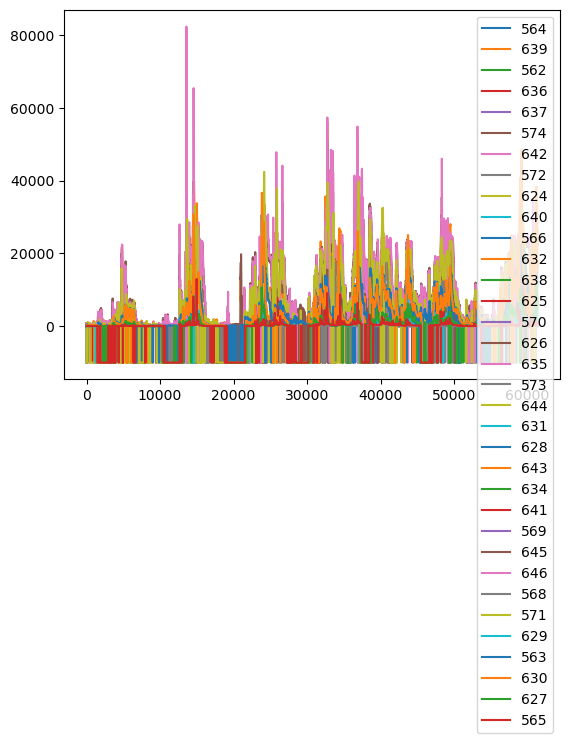

In [14]:
path='Iowa_small/data_time_series/'
for stat in connectedcom[2]:
    df=pd.read_csv(path+stat+'_data.csv')
    x=range(len(df.discharge))
    plt.plot(x,df.discharge,label=stat)
plt.legend()

### Set3(new set 1)

In [15]:
connectedcom[0]

['544',
 '605',
 '613',
 '602',
 '606',
 '549',
 '597',
 '1688',
 '607',
 '541',
 '600',
 '552',
 '614',
 '551',
 '610',
 '543',
 '612',
 '542',
 '598',
 '615',
 '539',
 '609',
 '553',
 '608',
 '604',
 '603',
 '546',
 '601',
 '599',
 '611',
 '540']

In [16]:
'608' in connectedcom[0]

True

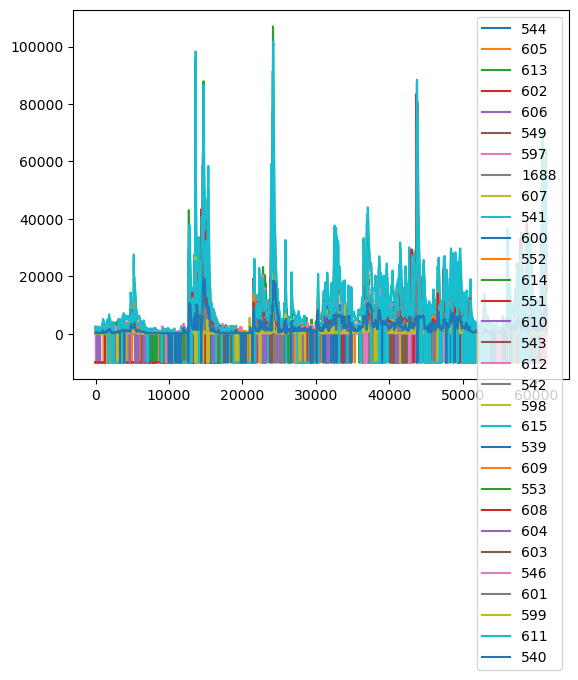

In [17]:
path='Iowa_small/data_time_series/'
for stat in connectedcom[0]:
    df=pd.read_csv(path+stat+'_data.csv')
    x=range(len(df.discharge))
    plt.plot(x,df.discharge,label=stat)
plt.legend()

In [88]:
# csv
relapath ="Iowa_small/set3/relationshipset3.csv"
#outputpath ="Iowa_small/time_series"
set3rela=[]
for i in range(len(relationship)):
    if relationship.station_id[i] in connectedcom[2]:
        if os.path.exists(relapath):
            relationship.loc[[i],:].to_csv(relapath,mode='a', header=False, index=False)
                #X.loc[[i],:].to_csv(filepath,mode='a', header=False, index=False)
        else:
            relationship.loc[[i],:].to_csv(relapath, index=False)

In [89]:
path='Iowa_small/set3'
files = [f for f in os.listdir(path) if f.endswith('.csv')]
#files = os.listdir(outputpath)
completefiles=[]
for file in files:
    X = pd.read_csv(path+'/'+file)
    num=0
    for i in range(len(X)):
        if(X.iloc[i,2]<=0):
            num=num+1
    if (num==0):
        completefiles.append(file)
        print(file)

2018-04-27 22:00:00.csv
2018-06-19 16:00:00.csv
2018-08-15 04:00:00.csv
2018-08-17 01:00:00.csv
2018-04-30 12:00:00.csv
2018-05-09 03:00:00.csv
2018-07-22 02:00:00.csv
2018-09-22 08:00:00.csv
2018-07-20 07:00:00.csv
2018-09-03 00:00:00.csv
2018-09-01 05:00:00.csv
2018-05-26 16:00:00.csv
2018-07-18 22:00:00.csv
2018-05-30 20:00:00.csv
2018-09-02 06:00:00.csv
2018-05-27 10:00:00.csv
2018-04-12 19:00:00.csv
2018-07-23 04:00:00.csv
2018-05-08 05:00:00.csv
2018-05-06 18:00:00.csv
2018-07-21 01:00:00.csv
2018-08-14 02:00:00.csv
2018-08-16 07:00:00.csv
2018-06-14 08:00:00.csv
2018-04-24 21:00:00.csv
2018-08-10 01:00:00.csv
2018-04-20 22:00:00.csv
2018-08-12 04:00:00.csv
2018-09-25 08:00:00.csv
2018-07-27 07:00:00.csv
2018-07-25 02:00:00.csv
2018-09-29 10:00:00.csv
2018-04-18 07:00:00.csv
2018-08-31 09:00:00.csv
2018-05-21 16:00:00.csv
2018-09-06 05:00:00.csv
2018-09-08 18:00:00.csv
2018-09-04 00:00:00.csv
2018-07-08 12:00:00.csv
2018-05-23 13:00:00.csv
2018-09-07 03:00:00.csv
2018-05-20 10:00

2018-07-05 15:00:00.csv
2018-07-07 10:00:00.csv
2018-04-15 00:00:00.csv
2018-04-19 18:00:00.csv
2018-08-25 23:00:00.csv
2018-08-30 16:00:00.csv
2018-04-17 05:00:00.csv
2018-03-25 21:00:00.csv
2018-05-03 04:00:00.csv
2018-07-28 05:00:00.csv
2018-09-24 17:00:00.csv
2018-07-26 18:00:00.csv
2018-09-26 12:00:00.csv
2018-05-01 01:00:00.csv
2018-06-13 11:00:00.csv
2018-06-11 14:00:00.csv
2018-06-04 21:00:00.csv
2018-06-17 12:00:00.csv
2018-08-17 18:00:00.csv
2018-08-19 05:00:00.csv
2018-06-15 17:00:00.csv
2018-09-20 14:00:00.csv
2018-05-07 07:00:00.csv
2018-05-05 02:00:00.csv
2018-09-22 11:00:00.csv
2018-04-11 03:00:00.csv
2018-04-13 06:00:00.csv
2018-08-21 20:00:00.csv
2018-07-01 16:00:00.csv
2018-09-03 19:00:00.csv
2018-07-14 23:00:00.csv
2018-05-28 12:00:00.csv
2018-07-03 13:00:00.csv
2018-07-17 20:00:00.csv
2018-05-27 09:00:00.csv
2018-07-02 15:00:00.csv
2018-05-29 14:00:00.csv
2018-08-22 23:00:00.csv
2018-04-10 05:00:00.csv
2018-04-12 00:00:00.csv
2018-05-06 01:00:00.csv
2018-09-21 12:00

2018-05-24 15:00:00.csv
2018-07-01 09:00:00.csv
2018-05-31 20:00:00.csv
2018-04-25 21:00:00.csv
2018-06-15 08:00:00.csv
2018-04-30 14:00:00.csv
2018-08-17 07:00:00.csv
2018-08-15 02:00:00.csv
2018-06-19 10:00:00.csv
2018-07-20 01:00:00.csv
2018-05-07 18:00:00.csv
2018-07-22 04:00:00.csv
2018-05-09 05:00:00.csv
2018-07-21 07:00:00.csv
2018-09-23 08:00:00.csv
2018-05-08 03:00:00.csv
2018-07-23 02:00:00.csv
2018-08-16 01:00:00.csv
2018-06-18 16:00:00.csv
2018-08-14 04:00:00.csv
2018-04-26 22:00:00.csv
2018-07-19 22:00:00.csv
2018-05-27 16:00:00.csv
2018-05-25 13:00:00.csv
2018-09-02 00:00:00.csv
2018-06-22 22:00:00.csv
2018-04-09 23:00:00.csv
2018-09-02 14:00:00.csv
2018-05-25 07:00:00.csv
2018-09-17 21:00:00.csv
2018-05-27 02:00:00.csv
2018-08-14 10:00:00.csv
2018-06-18 02:00:00.csv
2018-08-03 20:00:00.csv
2018-08-18 08:00:00.csv
2018-08-16 15:00:00.csv
2018-09-21 19:00:00.csv
2018-05-08 17:00:00.csv
2018-07-23 16:00:00.csv
2018-07-21 13:00:00.csv
2018-07-22 10:00:00.csv
2018-05-09 11:00

2018-07-30 22:00:00.csv
2018-09-27 18:00:00.csv
2018-09-29 05:00:00.csv
2018-07-25 17:00:00.csv
2018-07-27 12:00:00.csv
2018-08-12 11:00:00.csv
2018-08-05 21:00:00.csv
2018-08-10 14:00:00.csv
2018-05-23 06:00:00.csv
2018-07-08 07:00:00.csv
2018-09-04 15:00:00.csv
2018-09-11 20:00:00.csv
2018-09-06 10:00:00.csv
2018-05-21 03:00:00.csv
2018-04-18 12:00:00.csv
2018-06-24 23:00:00.csv
2018-06-20 20:00:00.csv
2018-04-10 09:00:00.csv
2018-05-29 18:00:00.csv
2018-07-02 19:00:00.csv
2018-09-15 23:00:00.csv
2018-05-27 05:00:00.csv
2018-05-25 00:00:00.csv
2018-09-02 13:00:00.csv
2018-08-16 12:00:00.csv
2018-06-18 05:00:00.csv
2018-08-14 17:00:00.csv
2018-08-01 22:00:00.csv
2018-07-21 14:00:00.csv
2018-05-04 08:00:00.csv
2018-05-08 10:00:00.csv
2018-07-23 11:00:00.csv
2018-07-20 12:00:00.csv
2018-09-20 18:00:00.csv
2018-07-22 17:00:00.csv
2018-05-09 16:00:00.csv
2018-08-19 09:00:00.csv
2018-08-02 21:00:00.csv
2018-04-30 07:00:00.csv
2018-08-17 14:00:00.csv
2018-06-19 03:00:00.csv
2018-05-26 03:00

2018-04-28 14:00:00.csv
2018-06-03 15:00:00.csv
2018-06-01 10:00:00.csv
2018-06-02 13:00:00.csv
2018-04-29 12:00:00.csv
2018-08-02 19:00:00.csv
2018-06-15 23:00:00.csv
2018-05-12 06:00:00.csv
2018-09-20 20:00:00.csv
2018-05-10 03:00:00.csv
2018-04-04 02:00:00.csv
2018-08-23 11:00:00.csv
2018-03-23 13:00:00.csv
2018-08-21 14:00:00.csv
2018-04-06 07:00:00.csv
2018-07-01 22:00:00.csv
2018-09-16 18:00:00.csv
2018-09-18 05:00:00.csv
2018-07-14 17:00:00.csv
2018-07-16 12:00:00.csv
2018-07-10 14:00:00.csv
2018-07-05 21:00:00.csv
2018-07-12 11:00:00.csv
2018-03-27 10:00:00.csv
2018-08-27 12:00:00.csv
2018-03-30 20:00:00.csv
2018-04-02 04:00:00.csv
2018-08-25 17:00:00.csv
2018-08-30 22:00:00.csv
2018-03-25 15:00:00.csv
2018-06-27 18:00:00.csv
2018-05-18 18:00:00.csv
2018-09-24 23:00:00.csv
2018-05-16 05:00:00.csv
2018-05-14 00:00:00.csv
2018-06-06 10:00:00.csv
2018-06-11 20:00:00.csv
2018-04-21 09:00:00.csv
2018-08-08 07:00:00.csv
2018-06-04 15:00:00.csv
2018-06-07 16:00:00.csv
2018-06-12 23:00

2018-08-07 22:00:00.csv
2018-08-12 17:00:00.csv
2018-08-12 03:00:00.csv
2018-08-10 06:00:00.csv
2018-06-12 09:00:00.csv
2018-04-22 20:00:00.csv
2018-06-09 21:00:00.csv
2018-09-29 17:00:00.csv
2018-07-27 00:00:00.csv
2018-04-18 00:00:00.csv
2018-08-28 23:00:00.csv
2018-04-14 18:00:00.csv
2018-03-28 21:00:00.csv
2018-07-06 08:00:00.csv
2018-07-08 15:00:00.csv
2018-05-23 14:00:00.csv
2018-09-04 07:00:00.csv
2018-09-06 02:00:00.csv
2018-05-21 11:00:00.csv
2018-09-05 01:00:00.csv
2018-05-22 12:00:00.csv
2018-07-09 13:00:00.csv
2018-05-20 17:00:00.csv
2018-09-07 04:00:00.csv
2018-09-09 19:00:00.csv
2018-04-19 06:00:00.csv
2018-08-30 08:00:00.csv
2018-06-30 02:00:00.csv
2018-07-24 03:00:00.csv
2018-09-28 11:00:00.csv
2018-09-24 09:00:00.csv
2018-07-26 06:00:00.csv
2018-04-21 23:00:00.csv
2018-08-13 05:00:00.csv
2018-08-11 00:00:00.csv
2018-04-30 15:00:00.csv
2018-08-17 06:00:00.csv
2018-04-25 20:00:00.csv
2018-06-15 09:00:00.csv
2018-08-15 03:00:00.csv
2018-06-19 11:00:00.csv
2018-07-20 00:00

IndexError: index 2 is out of bounds for axis 0 with size 2

In [90]:
len(completefiles)

2117

In [91]:
output = open('Iowa_small/set3/data.txt','w',encoding='gbk')
output.write('completedata\n')
for row in completefiles:
    output.write(row)
    output.write('\n')
output.close()

In [10]:
# csv
relapath ="Iowa_small/discharge/relationshipset2.csv"
#outputpath ="Iowa_small/time_series"
set2rela=[]
for i in range(len(relationship)):
    if relationship.station_id[i] in connectedcom[0]:
        if os.path.exists(relapath):
            relationship.loc[[i],:].to_csv(relapath,mode='a', header=False, index=False)
                #X.loc[[i],:].to_csv(filepath,mode='a', header=False, index=False)
        else:
            relationship.loc[[i],:].to_csv(relapath, index=False)